# Install and Import

In [ ]:
pip install scikeras[tensorflow]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 90.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.9 MB/s eta 0:00:00:00:01
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Succe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scikeras.wrappers import KerasClassifier

2024-08-22 11:51:33.235585: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 11:51:33.256305: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-22 11:51:33.262619: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data Exploration

In [ ]:
df= pd.read_csv('/kaggle/input/shopee-new-user-behavior/sample_data_DStest.csv')
df

user_id regist_date   gender age_group       region  \
0       418329478  2021-04-06   Female     19-24  Jabodetabek   
1       439733301  2021-05-08   Female     19-24  Jabodetabek   
2       434646106  2021-05-01   Female     19-24  Jabodetabek   
3       453720531  2021-05-29   Female     19-24  Jabodetabek   
4       418277451  2021-04-06   Female     19-24  Jabodetabek   
...           ...         ...      ...       ...          ...   
222373  436506199  2021-05-04  Unknown   Unknown     Non Java   
222374  436528461  2021-05-04  Unknown   Unknown     Non Java   
222375  436819143  2021-05-04  Unknown   Unknown     Non Java   
222376  444444333  2021-05-16  Unknown   Unknown     Non Java   
222377  444006614  2021-05-15  Unknown   Unknown     Non Java   

       is_rural_or_urban  is_buyer_14d  is_dp_buyer_14d  label  \
0                  RURAL             0                0      0   
1                  RURAL             0                0      0   
2                  RURAL             0                0      0   
3                  RURAL             0                0      0   
4                  RURAL             0                0      0   
...                  ...           ...              ...    ...   
222373             URBAN             1                0      1   
222374             URBAN             1                1      1   
222375             URBAN             1                1      1   
222376             URBAN             1                1      1   
222377             URBAN             1                1      1   

                         new_buyer_initiative  ...  use_hemat  shop_mall  \
0       Serba Seribu - Price Point Collection  ...        NaN        NaN   
1                                      No KSP  ...        NaN        NaN   
2                                         FSV  ...        NaN        NaN   
3                           Shopee Dari Rumah  ...        NaN        NaN   
4                                         FSV  ...        NaN        NaN   
...                                       ...  ...        ...        ...   
222373                                    FS0  ...        0.0        0.0   
222374                                 No KSP  ...        NaN        NaN   
222375                 Snack Video - New User  ...        NaN        NaN   
222376            SPay - Online - Google Play  ...        NaN        NaN   
222377                             Free Money  ...        0.0        3.0   

        shop_ss_plus  shop_ss  shop_cb  shop_sbs  shop_normal_shop  \
0                NaN      NaN      NaN       NaN               NaN   
1                NaN      NaN      NaN       NaN               NaN   
2                NaN      NaN      NaN       NaN               NaN   
3                NaN      NaN      NaN       NaN               NaN   
4                NaN      NaN      NaN       NaN               NaN   
...              ...      ...      ...       ...               ...   
222373           1.0      1.0      0.0       0.0               1.0   
222374           NaN      NaN      NaN       NaN               NaN   
222375           NaN      NaN      NaN       NaN               NaN   
222376           NaN      NaN      NaN       NaN               NaN   
222377           6.0      6.0      0.0       0.0               2.0   

        shop_flash_sale  activate_shopeepay  top_up_14d  
0                   NaN                   0         NaN  
1                   NaN                   0         NaN  
2                   NaN                   0         NaN  
3                   NaN                   0         NaN  
4                   NaN                   0         NaN  
...                 ...                 ...         ...  
222373              0.0                   1         NaN  
222374              NaN                   1         NaN  
222375              NaN                   1     30000.0  
222376              NaN                   1     50000.0  
222377              0.0                   1 

In [ ]:
df['user_id'].nunique() #check duplicate (no duplicate)

222378

In [ ]:
df = df.drop(['user_id', 'regist_date'], axis=1) #dropped due to irrelevance

In [ ]:
df.columns

Index(['gender', 'age_group', 'region', 'is_rural_or_urban', 'is_buyer_14d',
       'is_dp_buyer_14d', 'label', 'new_buyer_initiative',
       'total_voucher_claim_14d', 'total_order_14d', 'gmv_14d',
       'pdp_views_14d', 'shop_views_14d', 'total_login_days_l14d',
       'total_login_sessions_l14d', 'time_spent_platform_14d',
       'avg_time_per_session_14d', 'use_shopeepay', 'use_shopeepaylater',
       'use_cod', 'use_va_bt', 'use_cc_debit', 'use_instant', 'use_sameday',
       'use_nextday', 'use_regular', 'use_hemat', 'shop_mall', 'shop_ss_plus',
       'shop_ss', 'shop_cb', 'shop_sbs', 'shop_normal_shop', 'shop_flash_sale',
       'activate_shopeepay', 'top_up_14d'],
      dtype='object')

In [ ]:
#define categorical and numerical columns
cat_cols= ['gender', 'age_group', 'region',
       'is_rural_or_urban', 'is_buyer_14d', 'is_dp_buyer_14d', 'label',
       'new_buyer_initiative', 'activate_shopeepay']
num_cols= ['total_voucher_claim_14d', 'total_order_14d',
       'gmv_14d', 'pdp_views_14d', 'shop_views_14d', 'total_login_days_l14d',
       'total_login_sessions_l14d', 'time_spent_platform_14d',
       'avg_time_per_session_14d', 'use_shopeepay', 'use_shopeepaylater',
       'use_cod', 'use_va_bt', 'use_cc_debit', 'use_instant', 'use_sameday',
       'use_nextday', 'use_regular', 'use_hemat', 'shop_mall', 'shop_ss_plus',
       'shop_ss', 'shop_cb', 'shop_sbs', 'shop_normal_shop', 'shop_flash_sale', 'top_up_14d']

In [ ]:
#check missing value
print("categorical data \n",df[cat_cols].isnull().sum(),"\n")
print("numerical data\n",df[num_cols].isnull().sum())

categorical data 
 gender                    0
age_group                 0
region                    0
is_rural_or_urban         0
is_buyer_14d              0
is_dp_buyer_14d           0
label                     0
new_buyer_initiative    378
activate_shopeepay        0
dtype: int64 

numerical data
 total_voucher_claim_14d       97907
total_order_14d               67577
gmv_14d                       67577
pdp_views_14d                  8355
shop_views_14d                60857
total_login_days_l14d             0
total_login_sessions_l14d       790
time_spent_platform_14d         790
avg_time_per_session_14d        872
use_shopeepay                 67577
use_shopeepaylater            67577
use_cod                       67577
use_va_bt                     67577
use_cc_debit                  67577
use_instant                   67577
use_sameday                   67577
use_nextday                   67577
use_regular                   67577
use_hemat                     67577
shop_mall     

{'gender': gender
Female     117564
Male        87416
Unknown     17398
Name: count, dtype: int64, 'age_group': age_group
Unknown    148021
19-24       25144
<19         17302
25-30       13590
>35         11621
30-35        6700
Name: count, dtype: int64, 'region': region
Java non Jabodetabek    99930
Non Java                84475
Jabodetabek             37973
Name: count, dtype: int64, 'is_rural_or_urban': is_rural_or_urban
URBAN    140295
RURAL     82083
Name: count, dtype: int64, 'is_buyer_14d': is_buyer_14d
1    156209
0     66169
Name: count, dtype: int64, 'is_dp_buyer_14d': is_dp_buyer_14d
0    215039
1      7339
Name: count, dtype: int64, 'label': label
0    121895
1    100483
Name: count, dtype: int64, 'new_buyer_initiative': new_buyer_initiative
FS0                                      72774
COD                                      38656
FSV                                      27334
Serba Seribu - Price Point Collection    21331
No KSP                                   17263

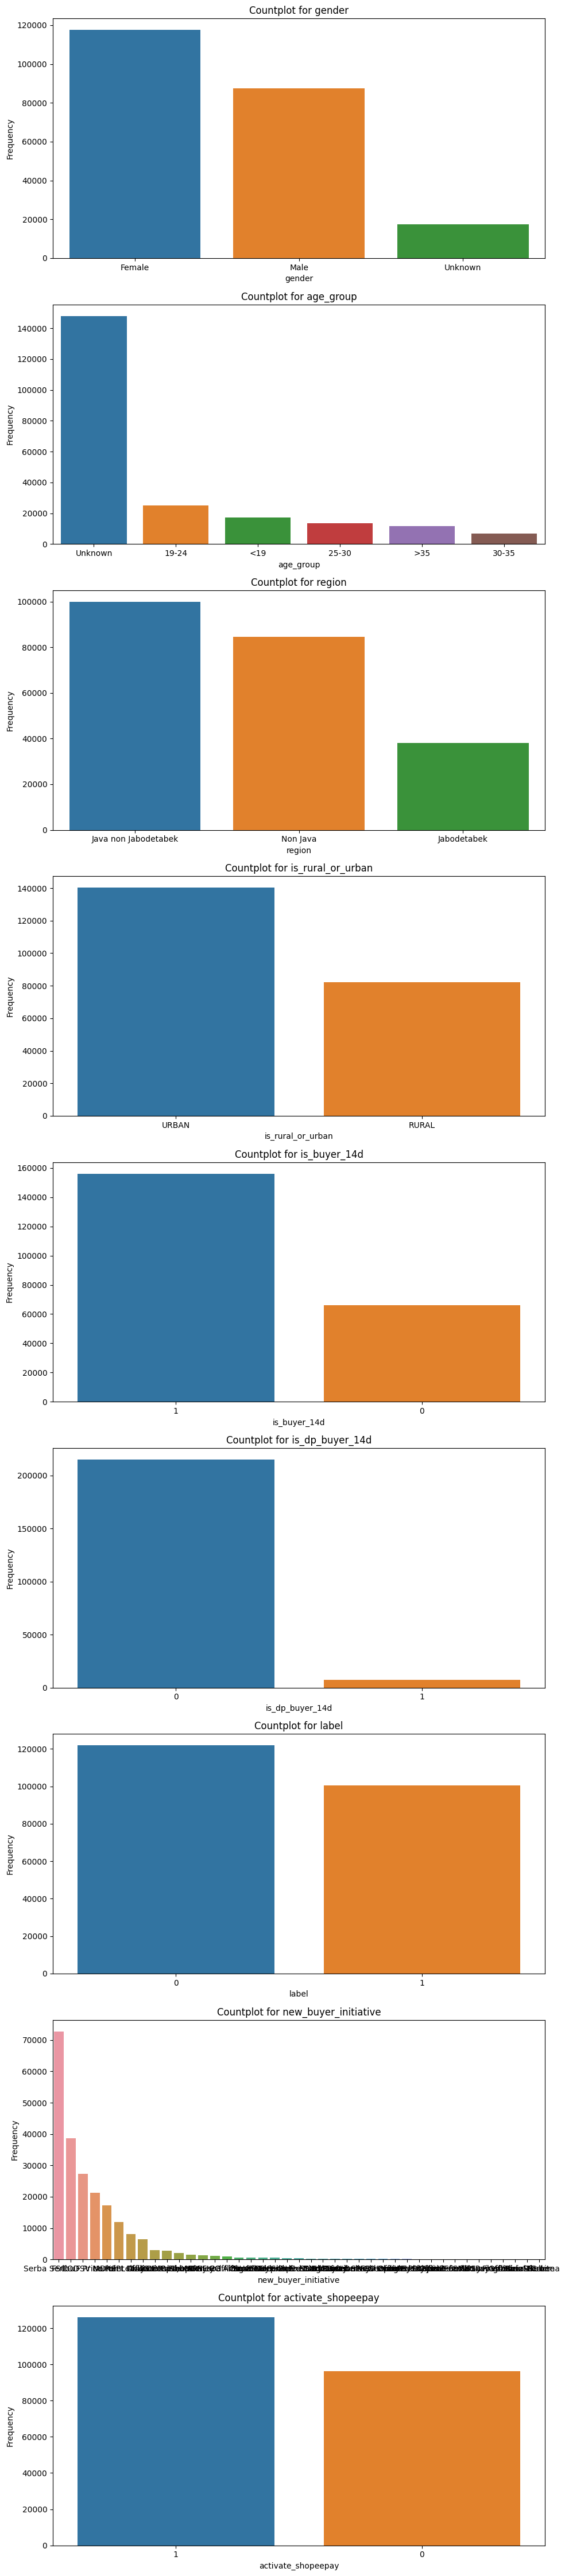

In [ ]:
#check unique value and create countplot of categorical columns
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(10, len(cat_cols) * 5))

unique_categories = {}

for i, column in enumerate(cat_cols):
    sns.countplot(ax=axes[i], x=df[column], order=df[column].value_counts().index)
    axes[i].set_title(f'Countplot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    unique_categories[column] = df[column].value_counts()

print(unique_categories)
plt.tight_layout()
plt.show()

In [ ]:
cat_cols.remove('label')

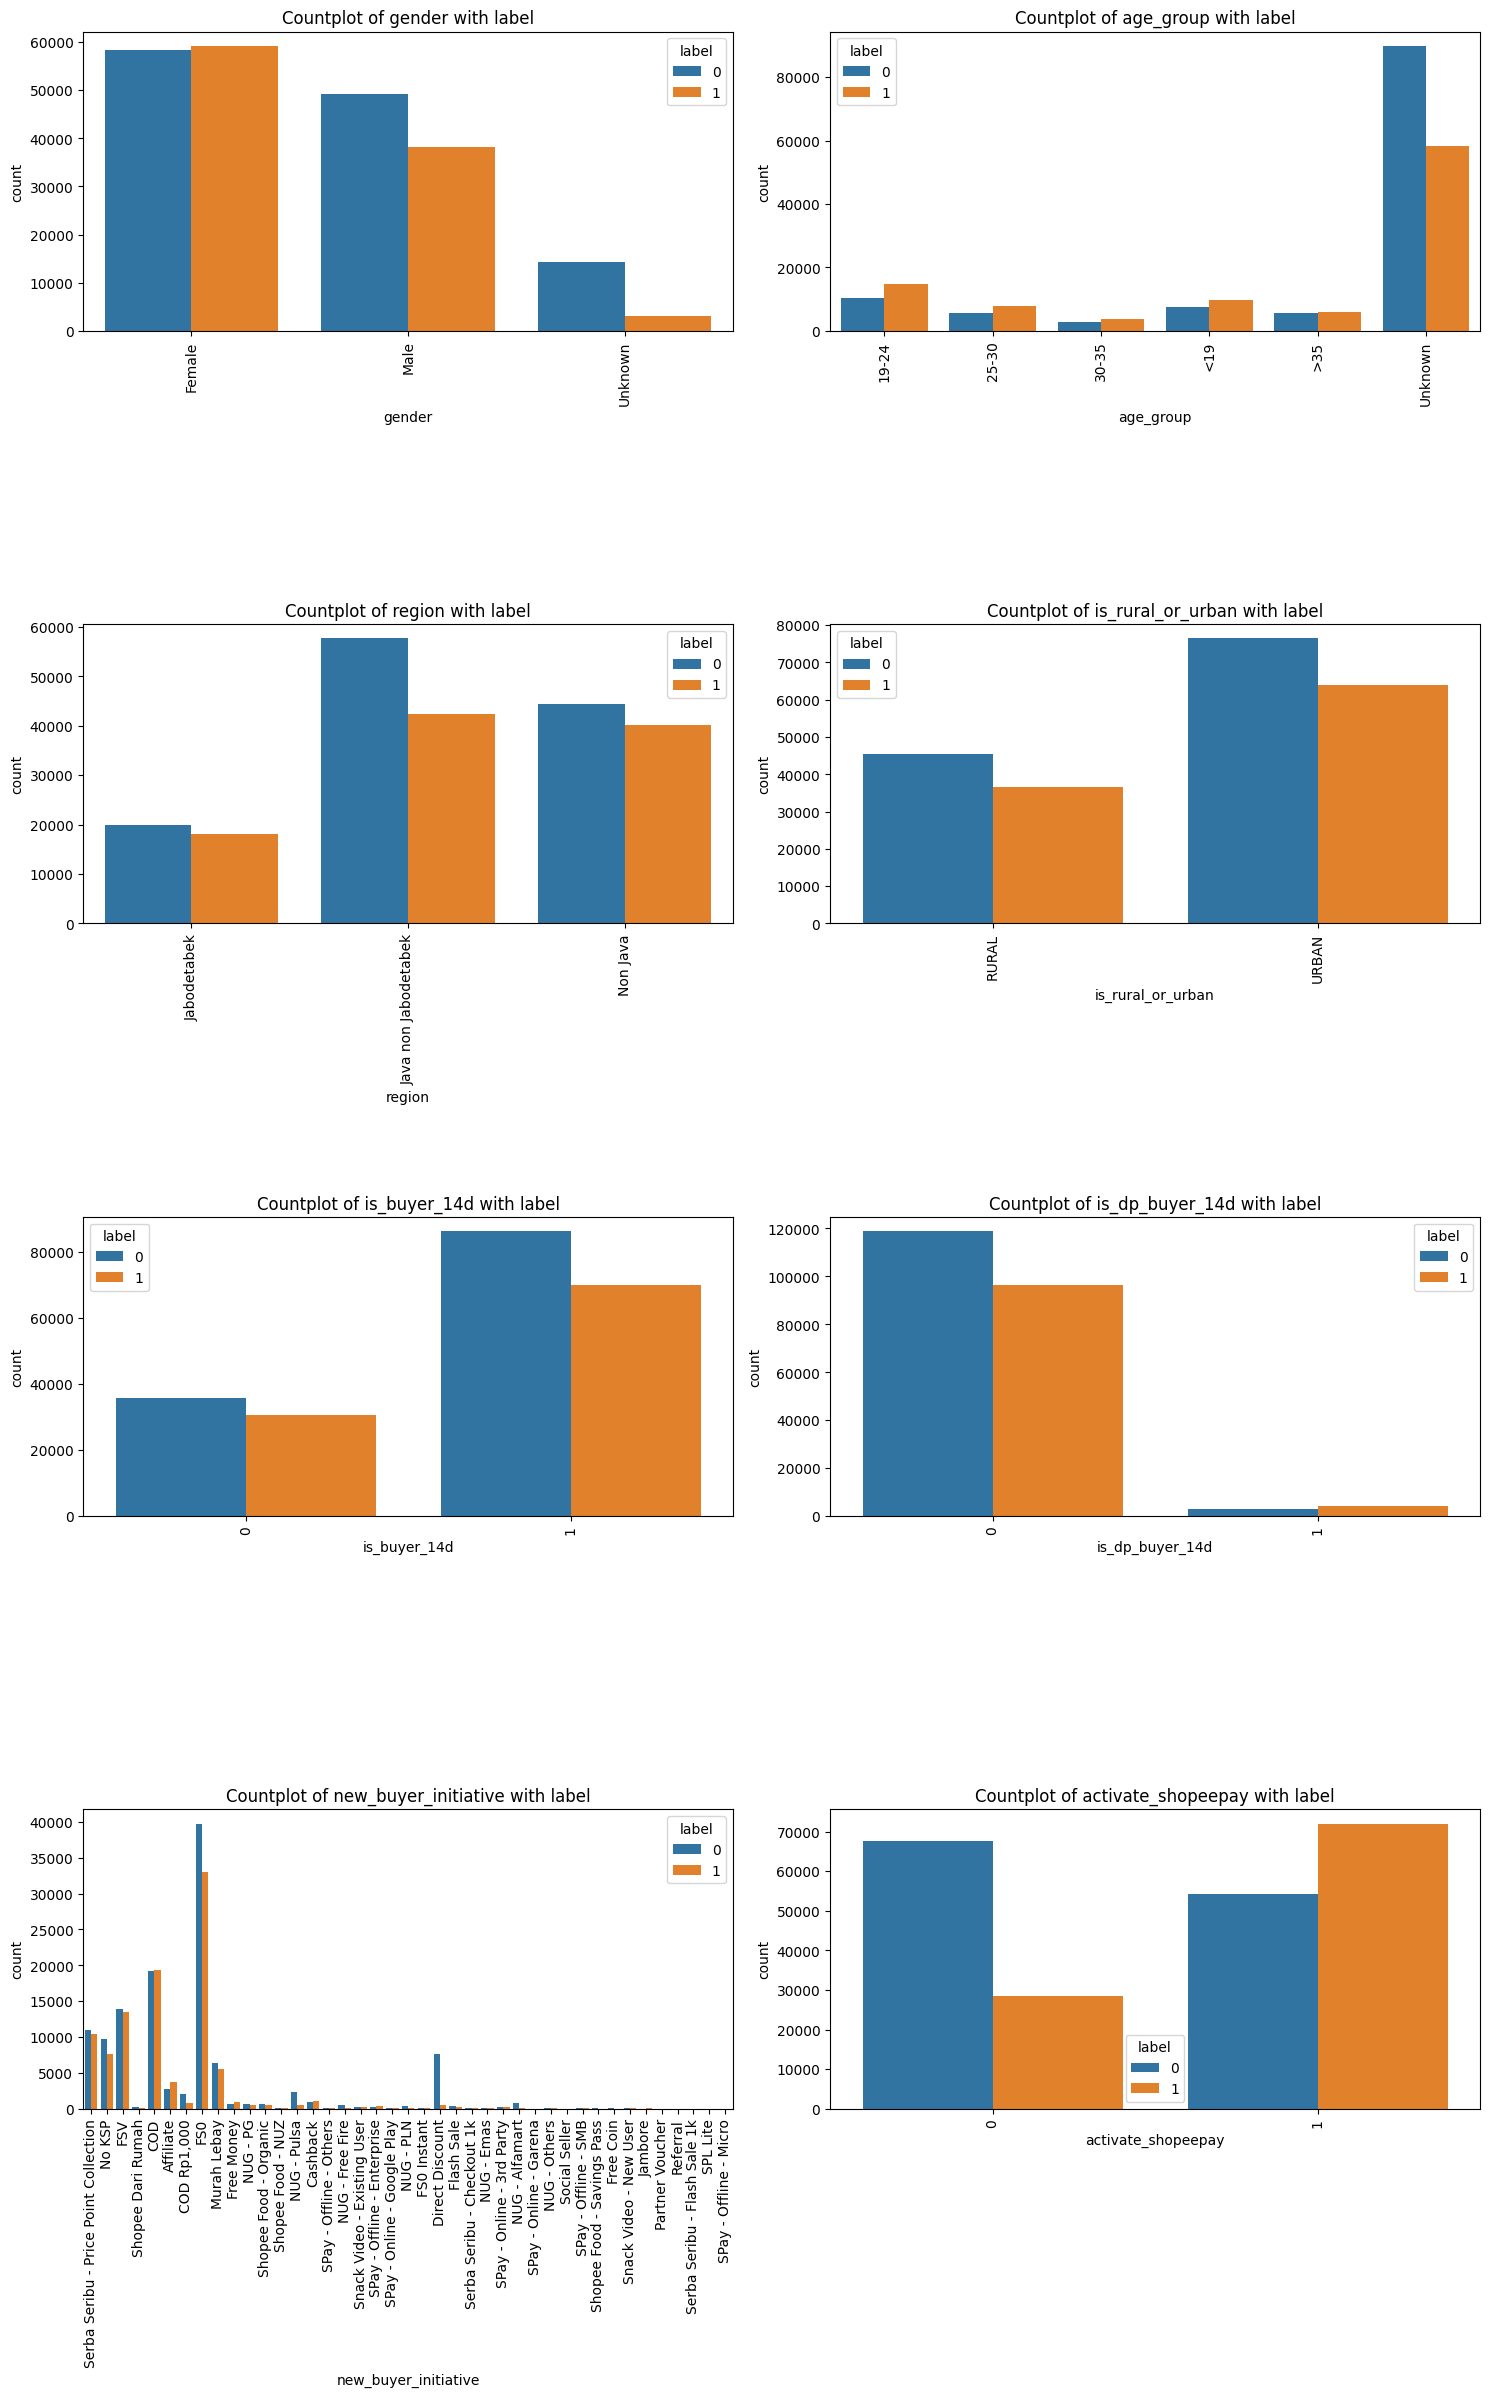

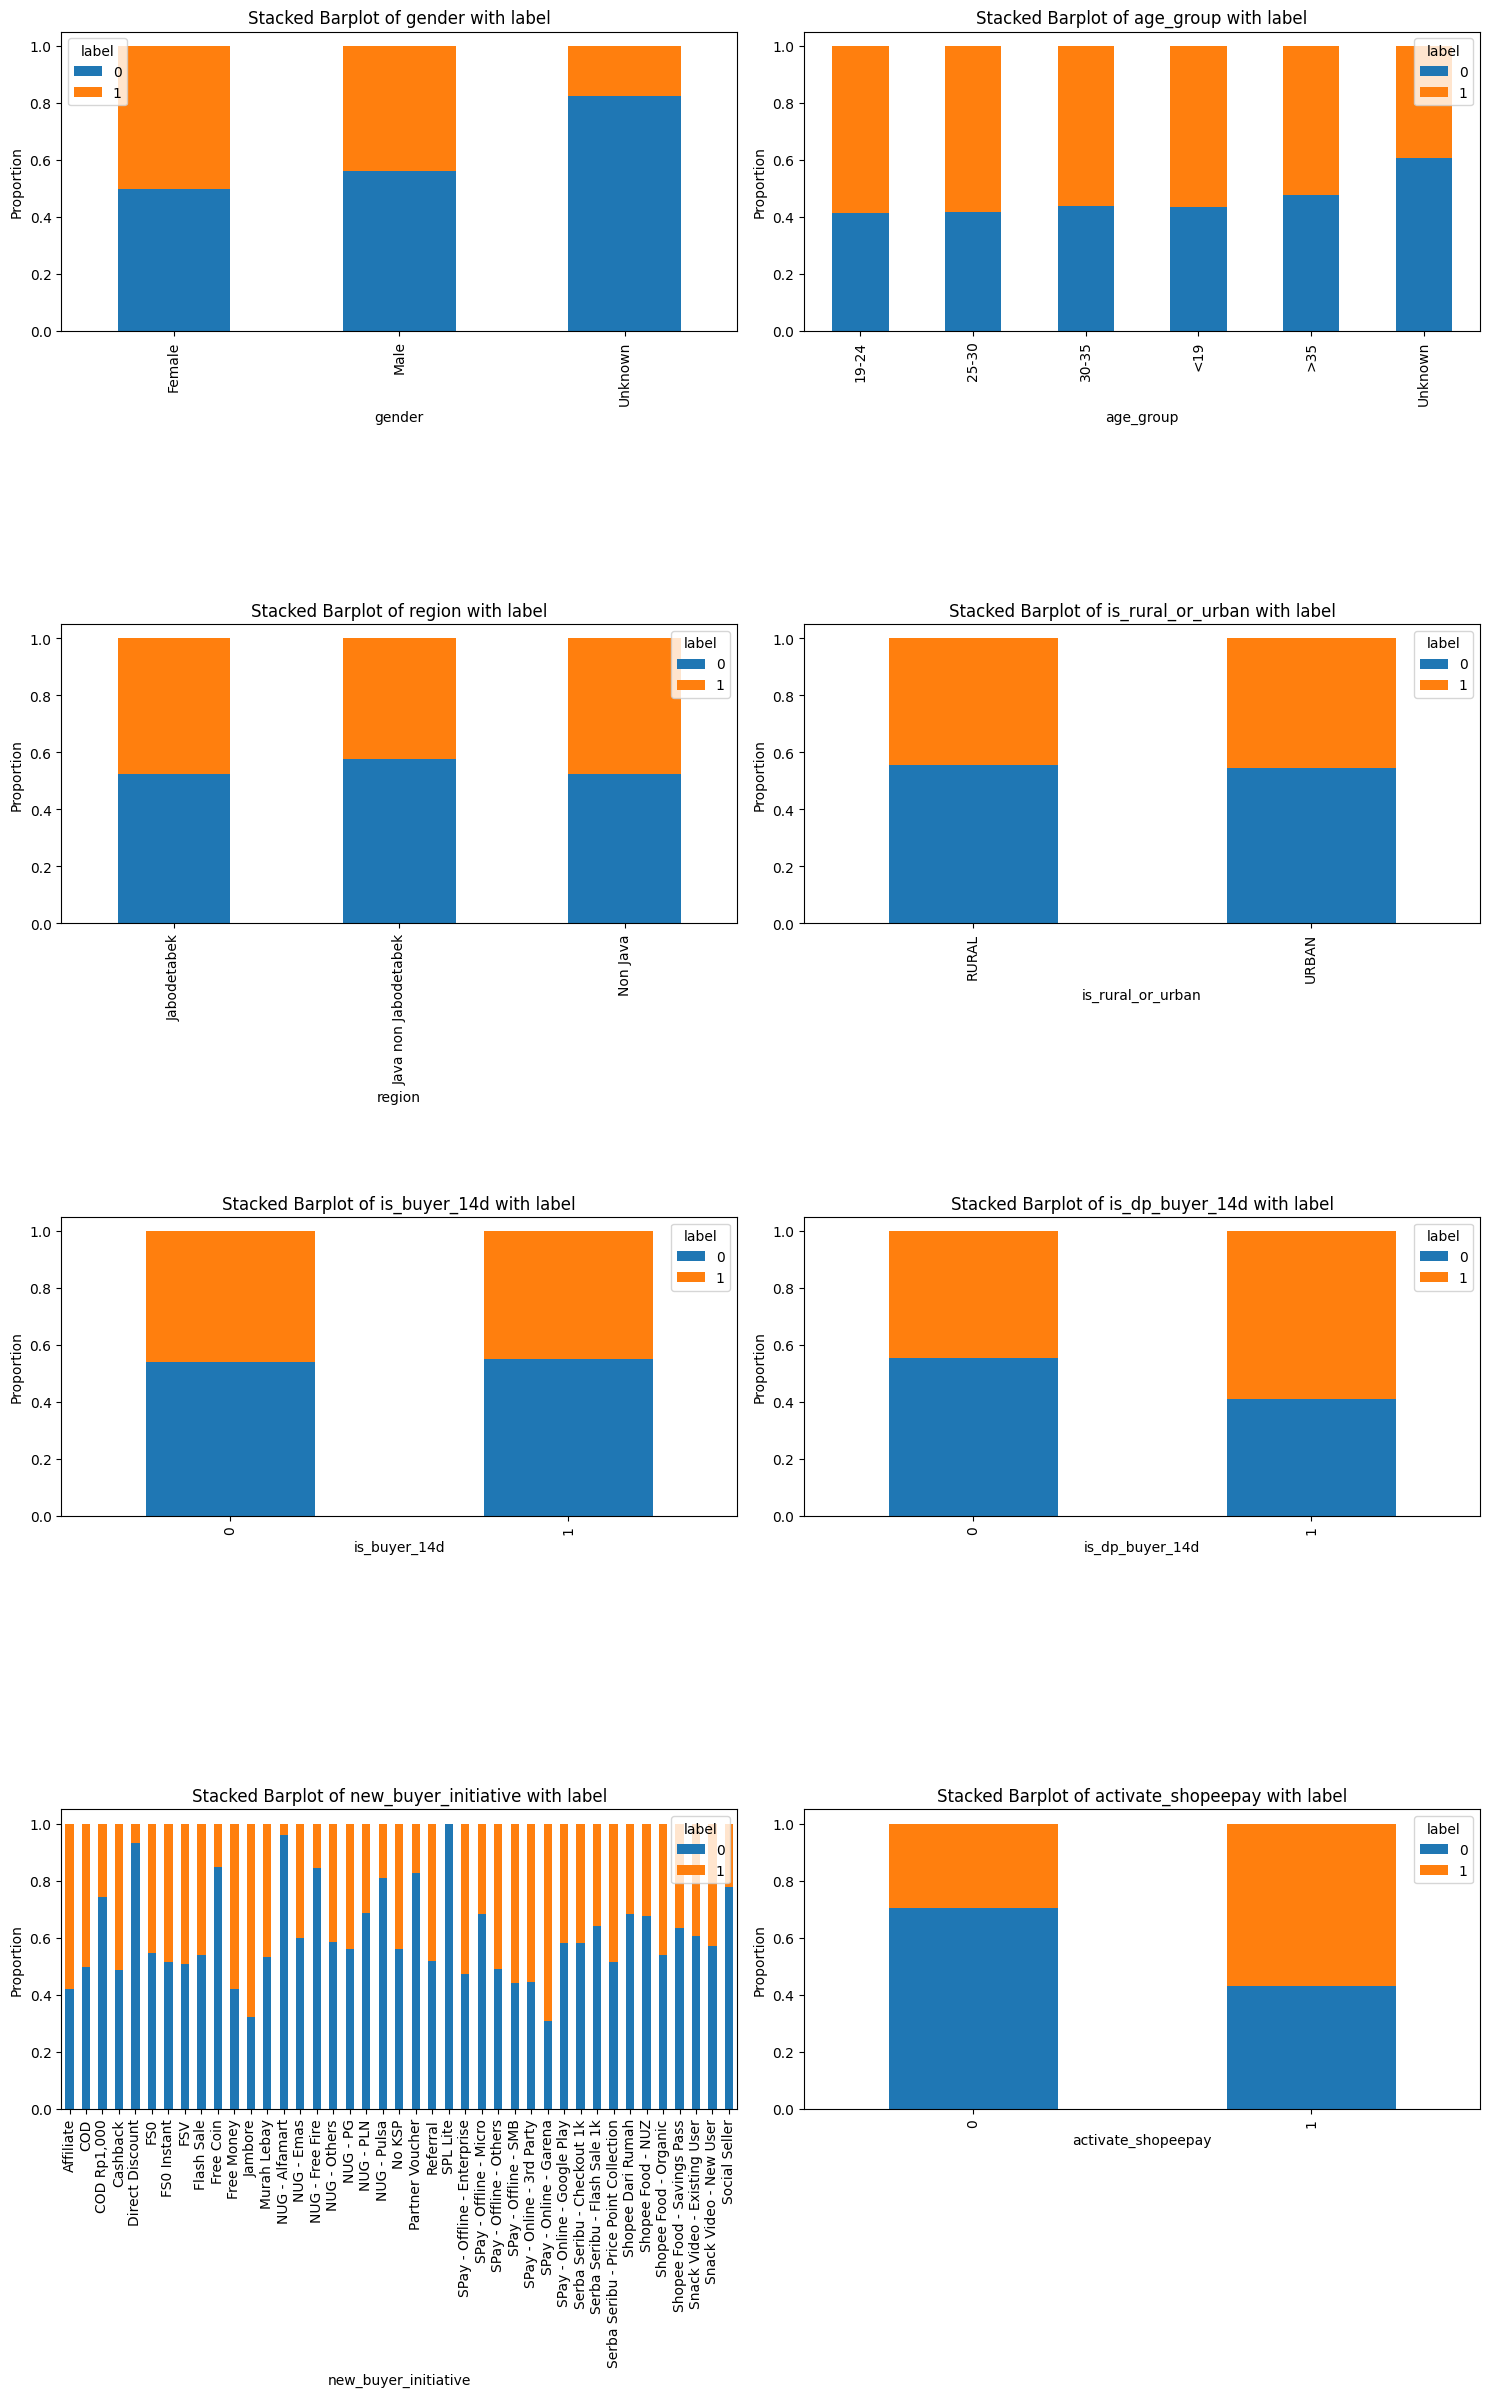

In [ ]:
#create countplot and stacked barplot to compare the number of a unique value based on the target label
plt.figure(figsize=(15, 45))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(8, 2, i)
    sns.countplot(x=col, hue='label', data=df)
    plt.title(f'Countplot of {col} with label')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 45))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(8, 2, i)
    cross_tab = pd.crosstab(df[col], df['label'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Stacked Barplot of {col} with label')
    plt.xticks(rotation=90)
    plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

In [ ]:
df.fillna(0, inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


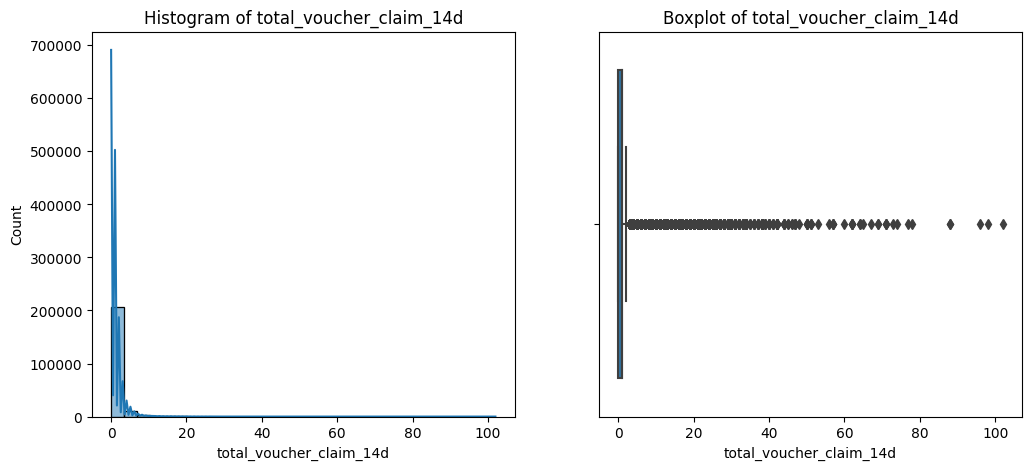

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


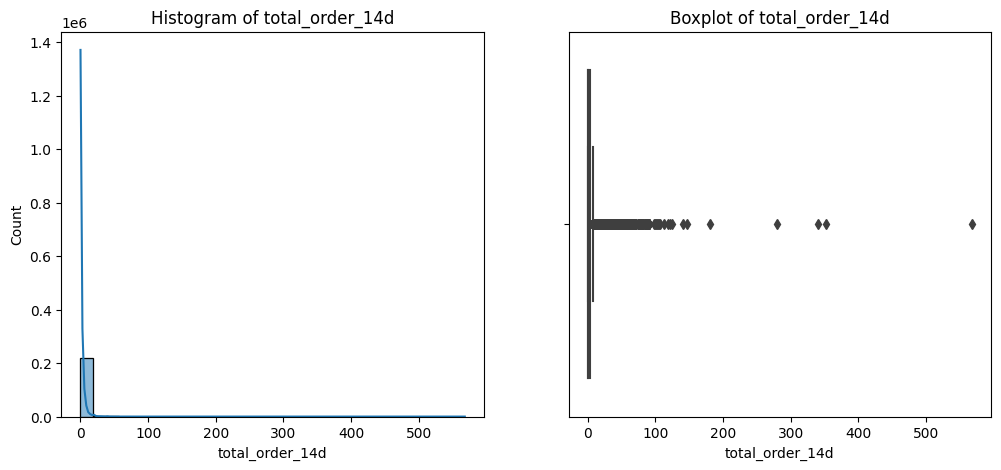

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


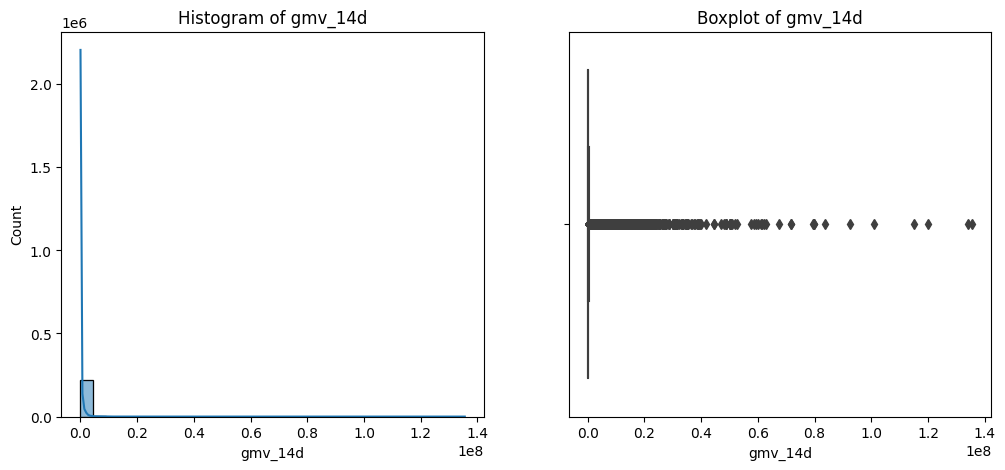

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


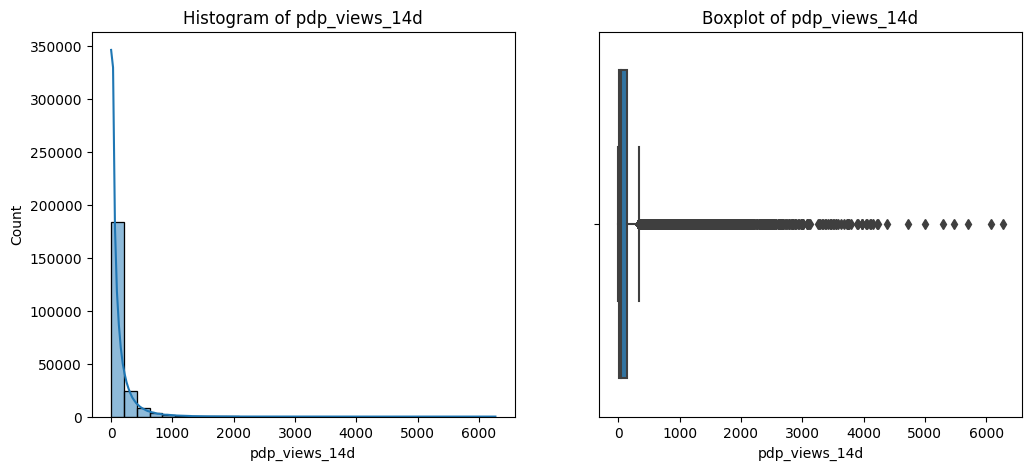

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


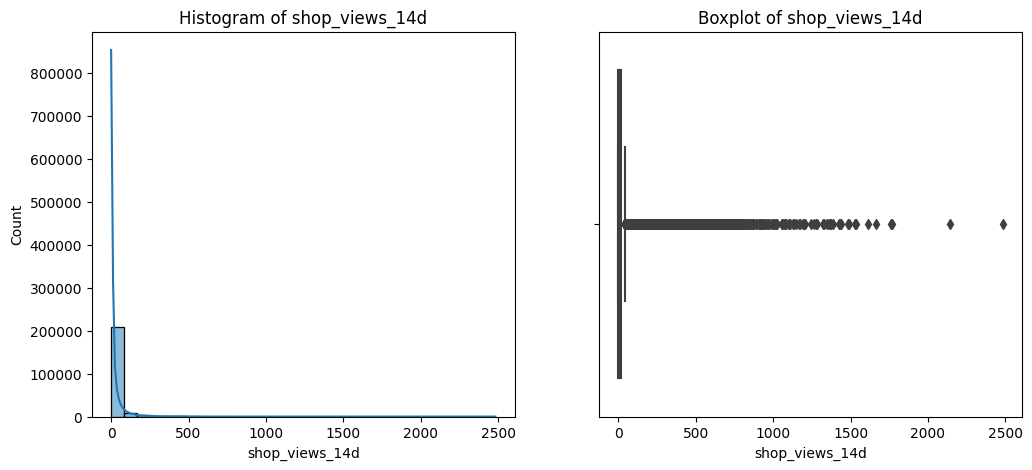

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


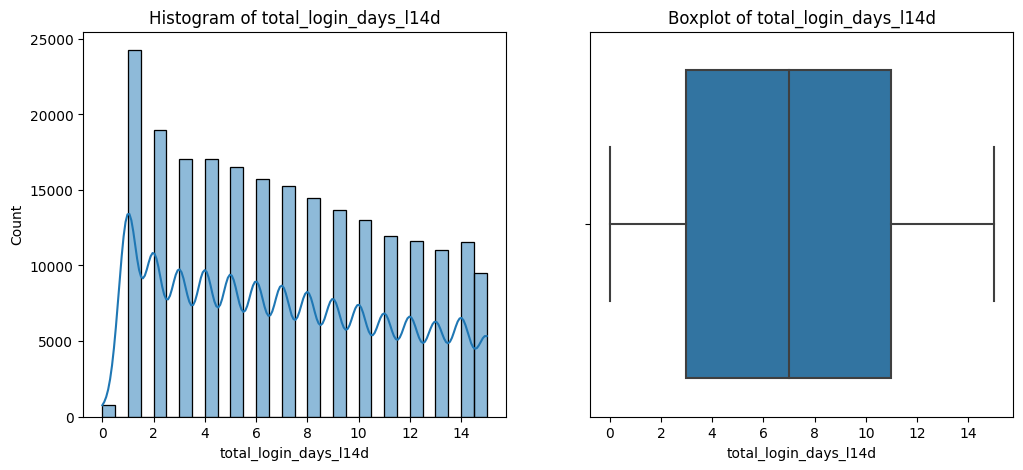

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


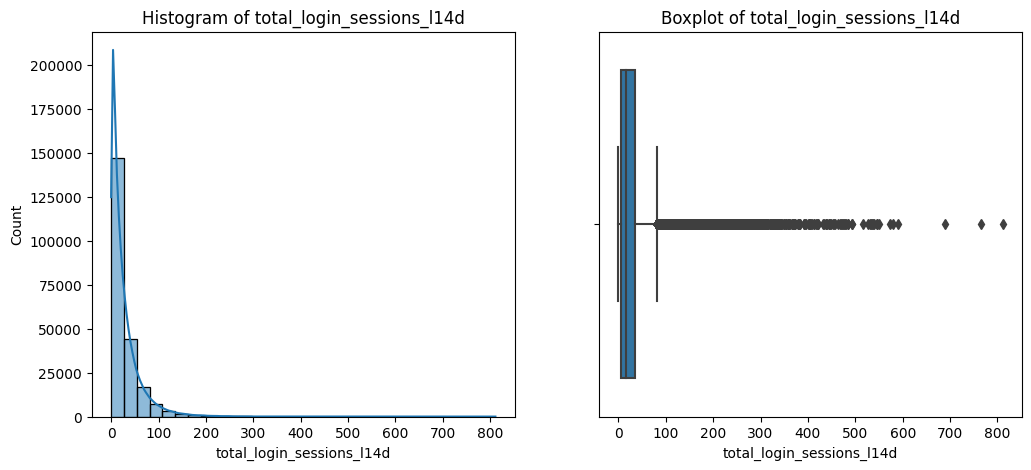

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


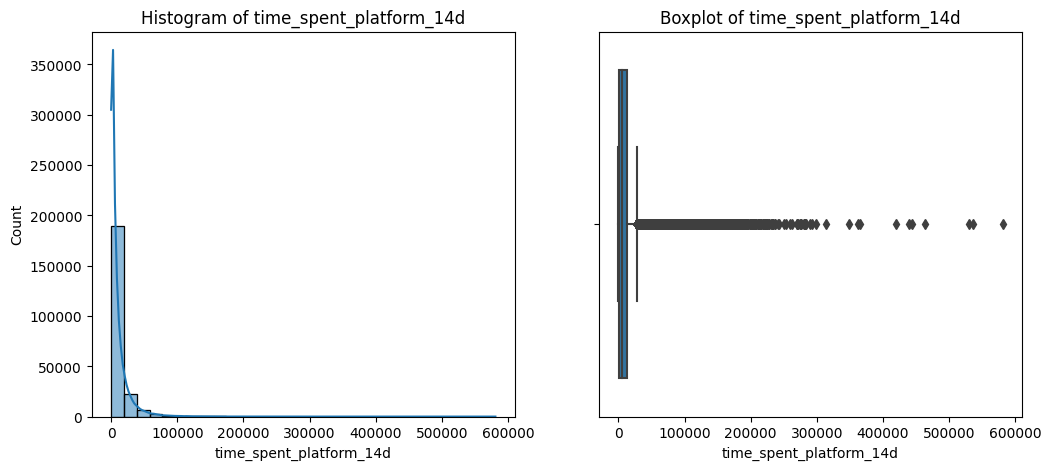

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


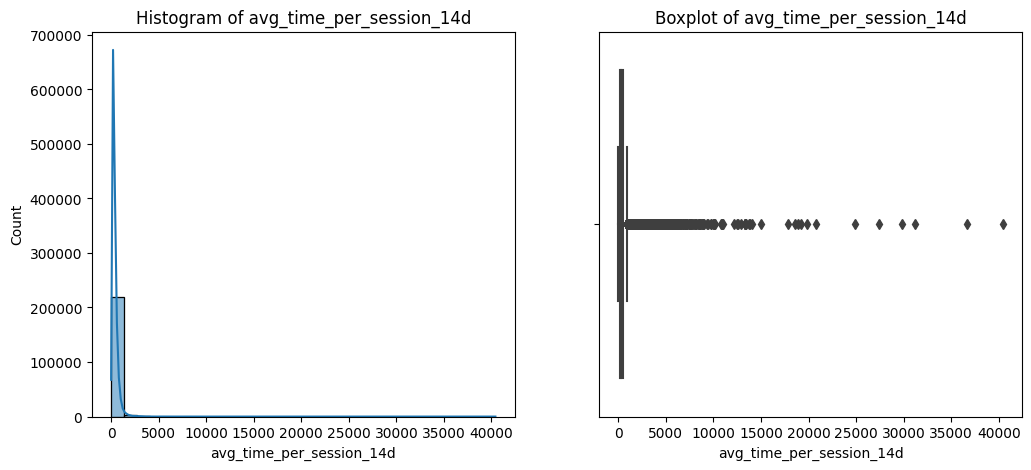

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


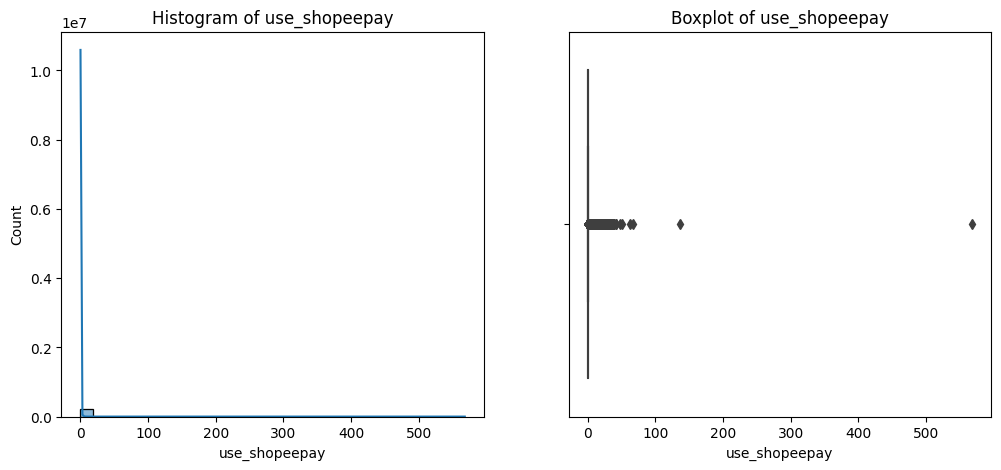

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


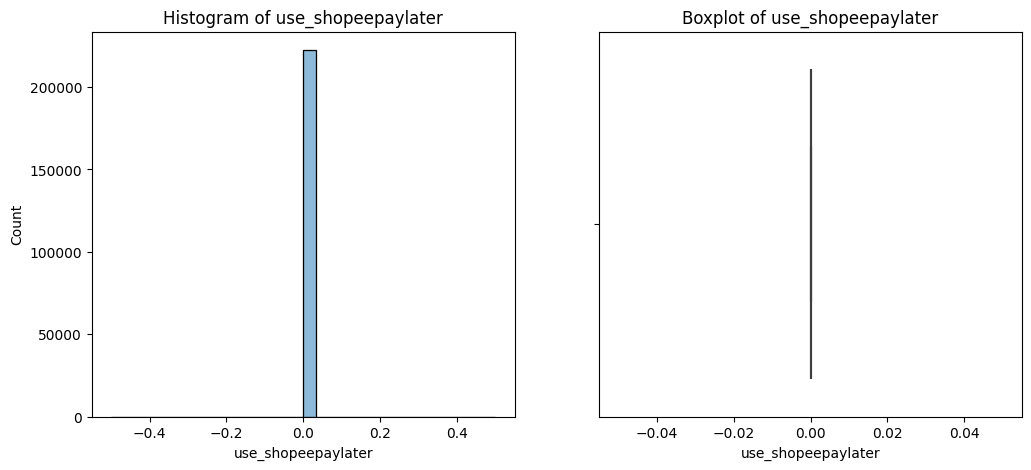

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


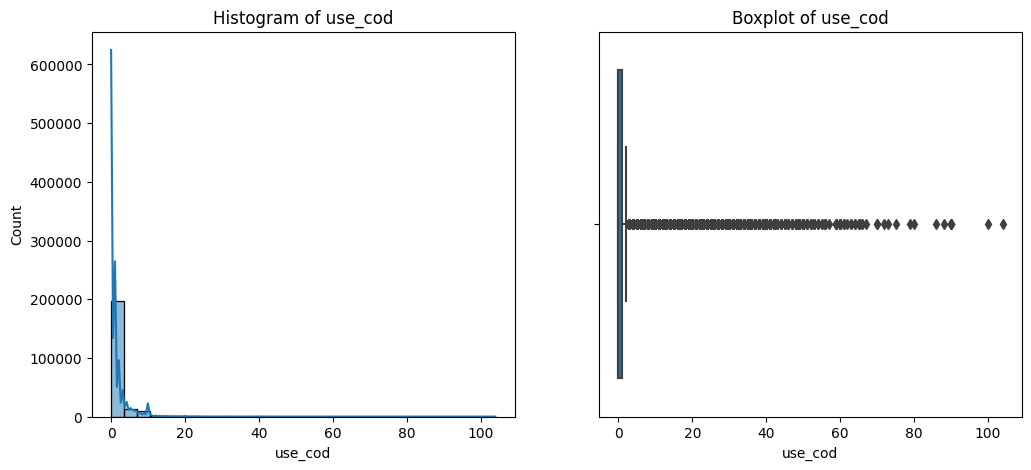

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


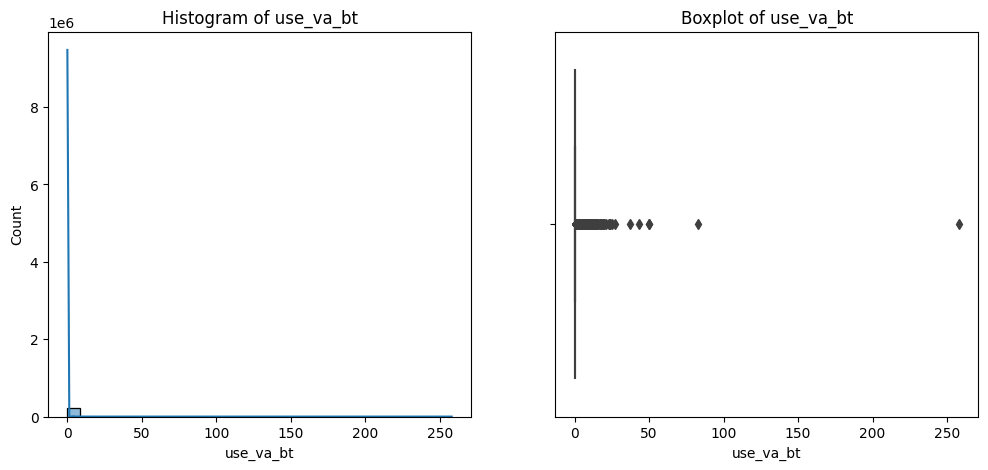

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


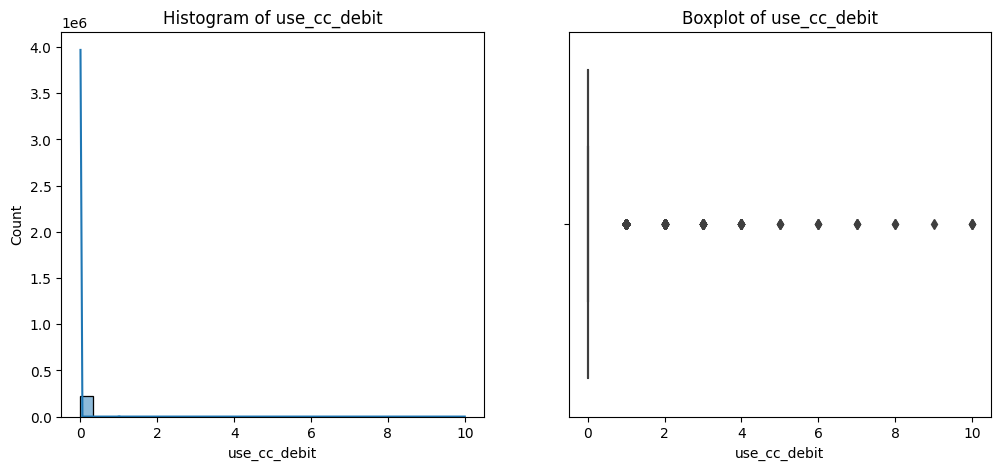

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


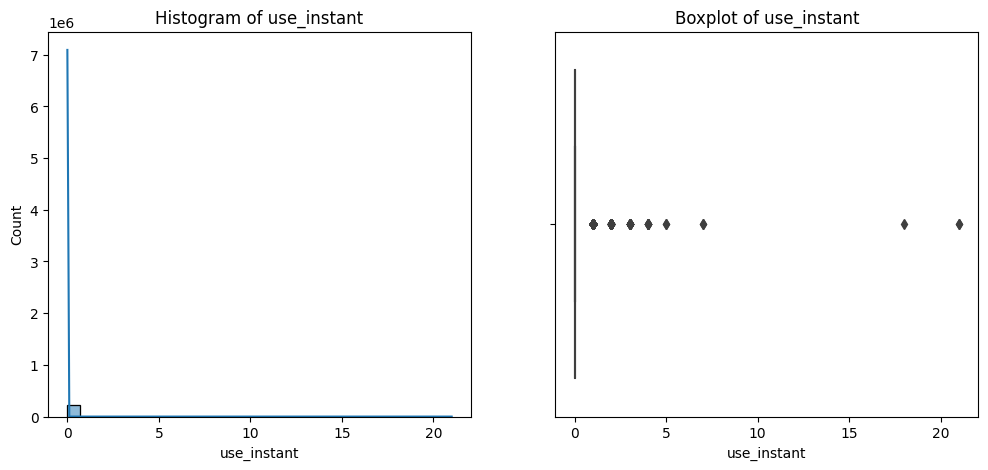

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


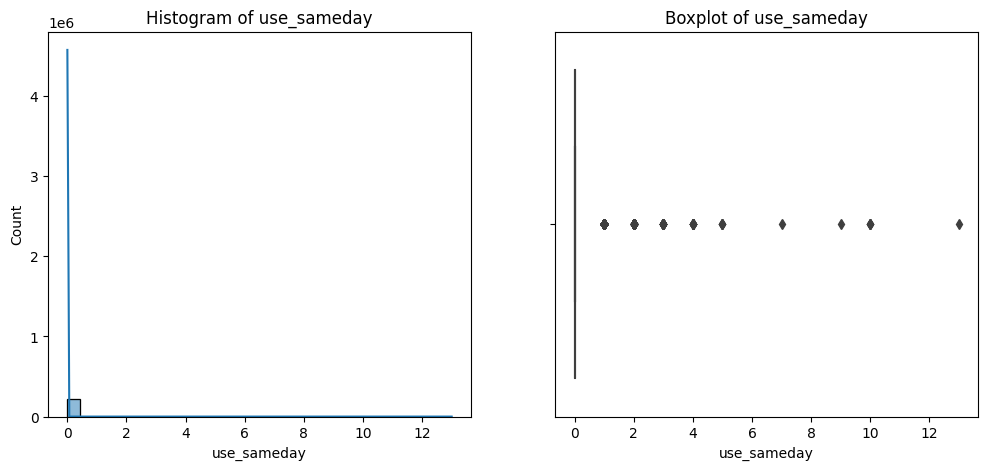

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


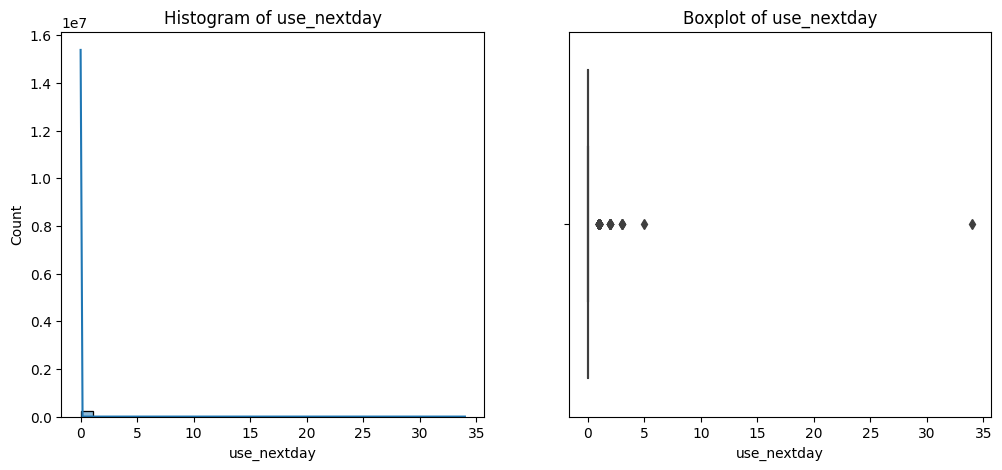

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


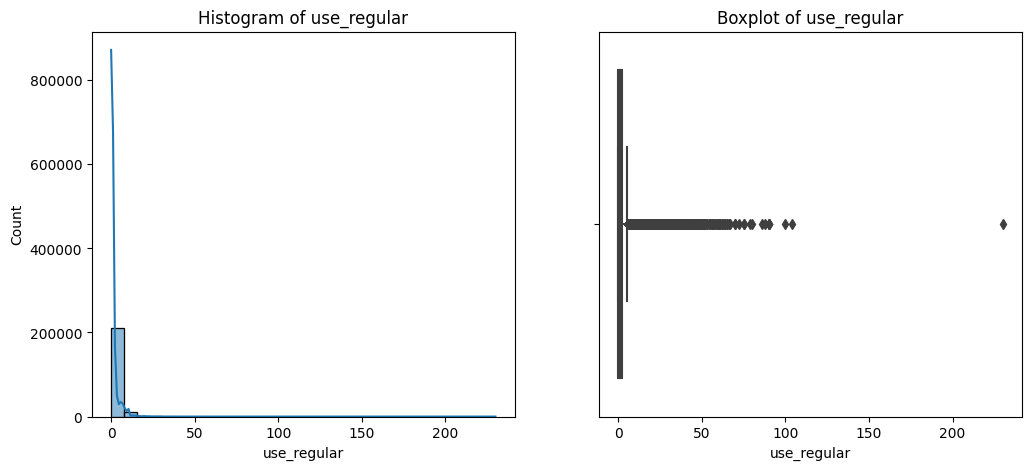

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


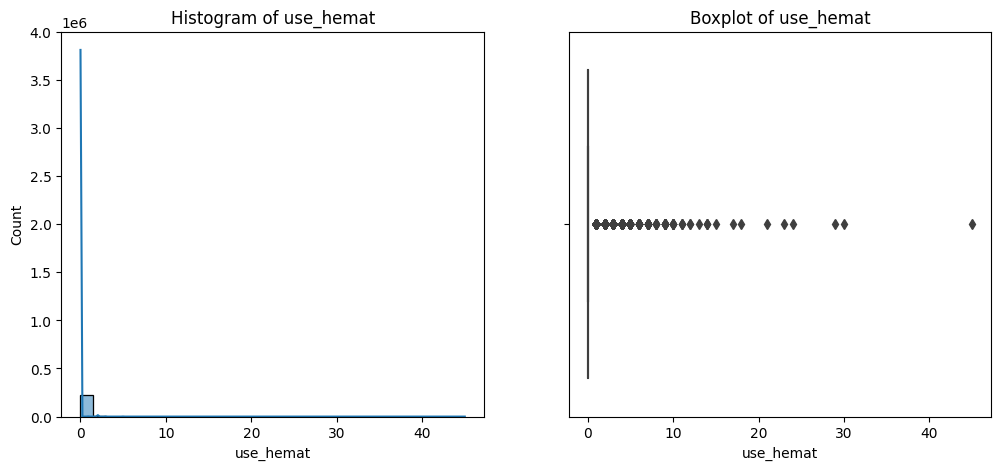

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


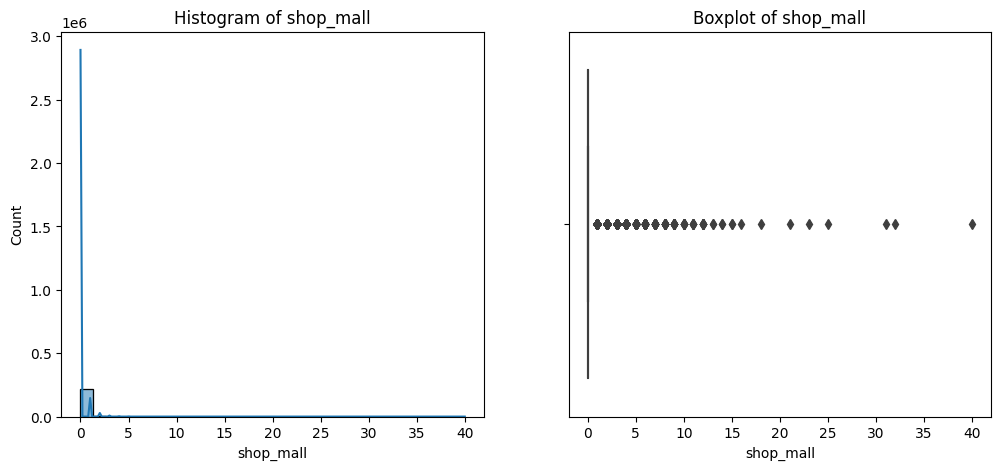

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


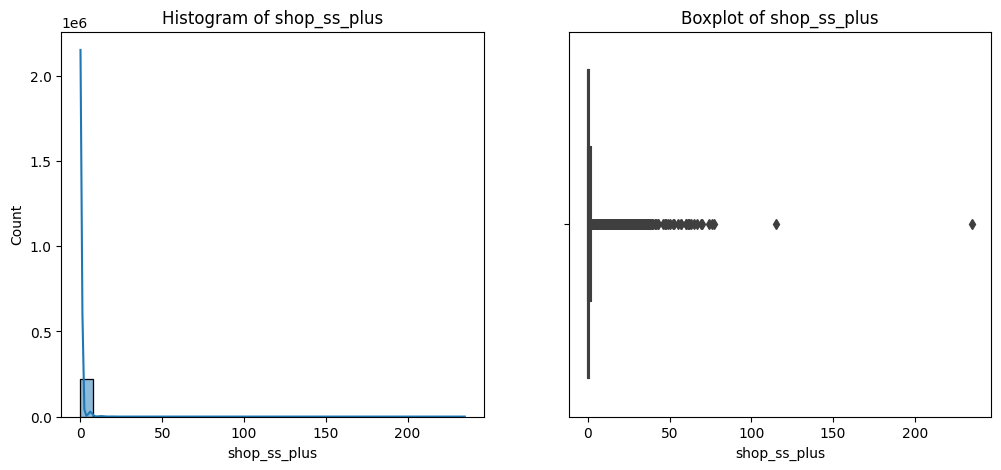

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


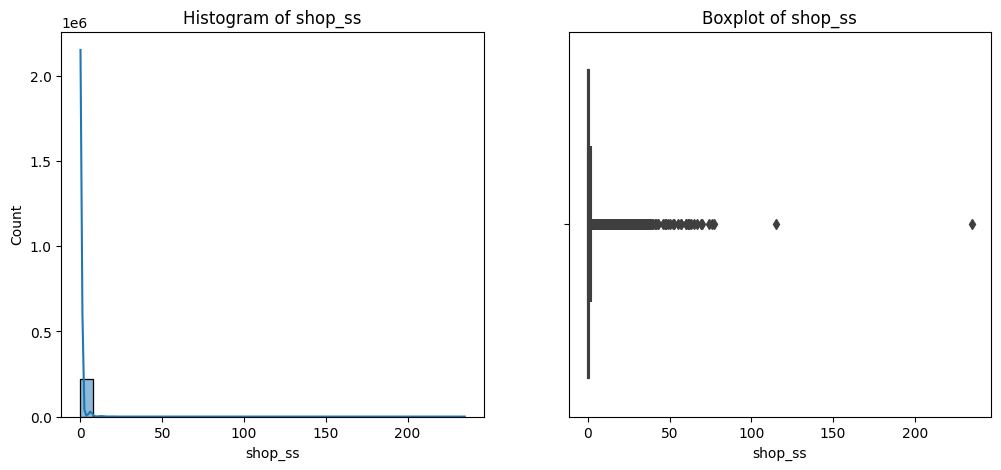

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


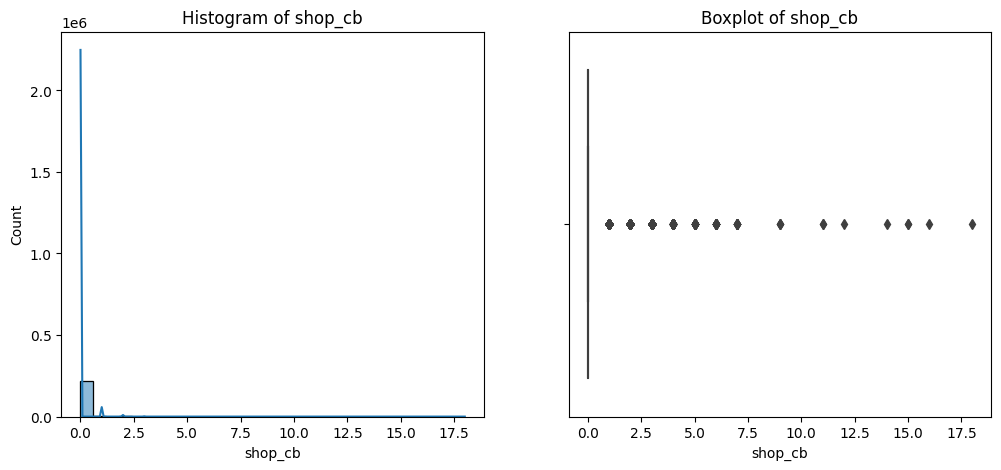

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


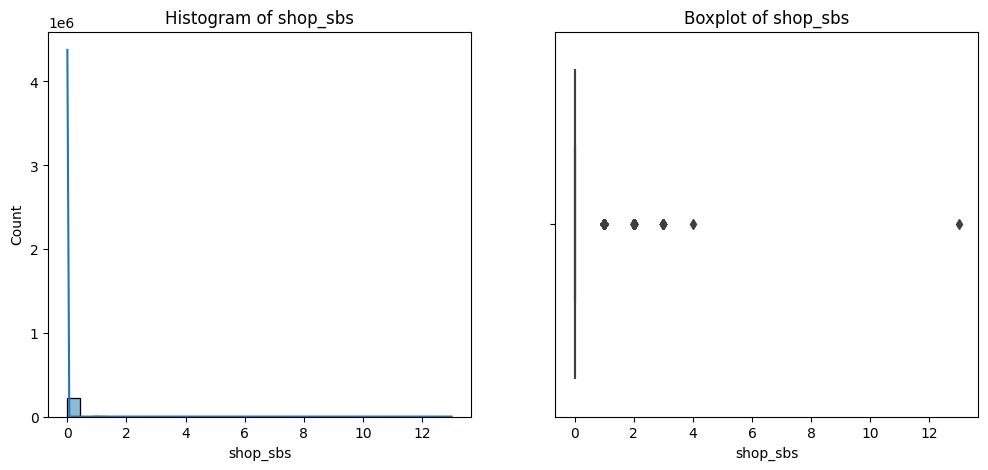

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


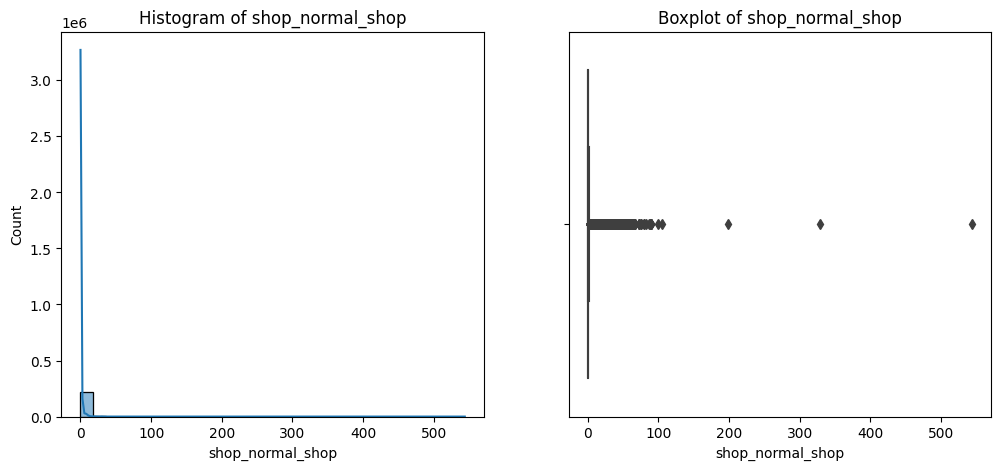

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


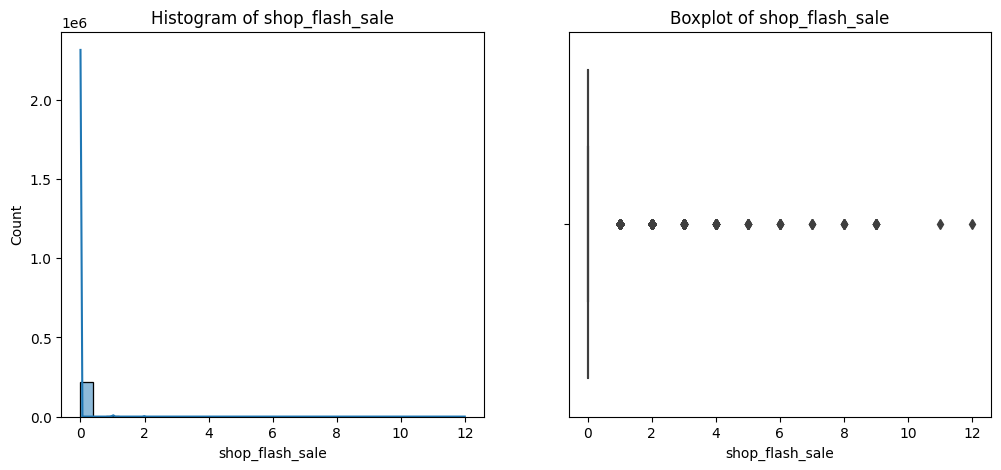

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


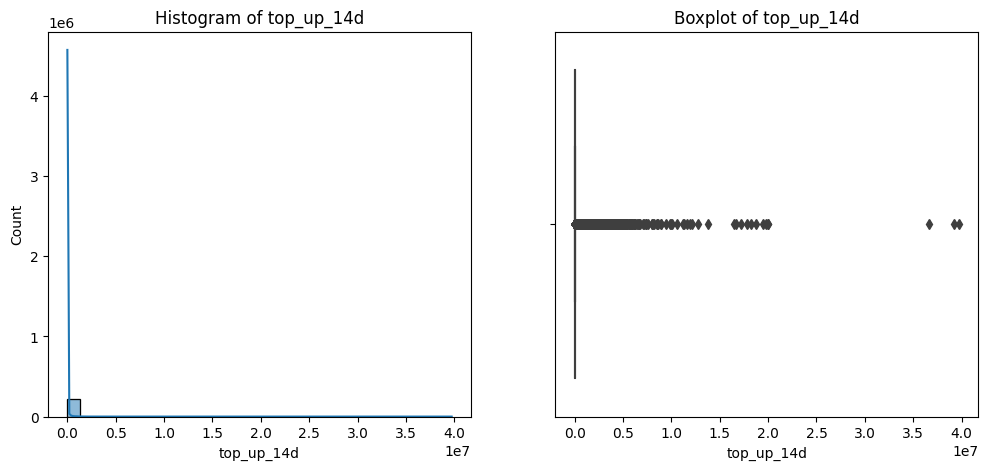

In [ ]:
#create histogram and boxplot for numerical columns
for col in num_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

In [ ]:
#basic statistical metrics, upper whisker, and lower whisker
stats_summary = df[num_cols].describe().T
stats_summary['IQR'] = stats_summary['75%'] - stats_summary['25%']
stats_summary['Upper Whisker'] = stats_summary['75%'] + 1.5 * stats_summary['IQR']
stats_summary['Lower Whisker'] = stats_summary['25%'] - 1.5 * stats_summary['IQR']

stats_summary

count           mean           std  min  \
total_voucher_claim_14d    222378.0       1.176177  2.255175e+00  0.0   
total_order_14d            222378.0       2.351878  4.523823e+00  0.0   
gmv_14d                    222378.0  305207.507357  1.375747e+06  0.0   
pdp_views_14d              222378.0     122.012578  2.103802e+02  0.0   
shop_views_14d             222378.0      20.707975  5.379264e+01  0.0   
total_login_days_l14d      222378.0       6.982278  4.311525e+00  0.0   
total_login_sessions_l14d  222378.0      27.719986  3.375488e+01  0.0   
time_spent_platform_14d    222378.0   10332.787162  1.610739e+04  0.0   
avg_time_per_session_14d   222378.0     383.300531  4.130840e+02  0.0   
use_shopeepay              222378.0       0.225081  1.685388e+00  0.0   
use_shopeepaylater         222378.0       0.000000  0.000000e+00  0.0   
use_cod                    222378.0       1.415486  3.055496e+00  0.0   
use_va_bt                  222378.0       0.142532  8.611085e-01  0.0   
use_cc_debit               222378.0       0.002581  8.729276e-02  0.0   
use_instant                222378.0       0.003188  1.025524e-01  0.0   
use_sameday                222378.0       0.004326  9.832365e-02  0.0   
use_nextday                222378.0       0.000598  7.666191e-02  0.0   
use_regular                222378.0       1.829898  3.246976e+00  0.0   
use_hemat                  222378.0       0.061863  3.922673e-01  0.0   
shop_mall                  222378.0       0.088075  4.500680e-01  0.0   
shop_ss_plus               222378.0       0.963490  2.117013e+00  0.0   
shop_ss                    222378.0       0.963490  2.117013e+00  0.0   
shop_cb                    222378.0       0.041065  2.690466e-01  0.0   
shop_sbs                   222378.0       0.008868  1.021961e-01  0.0   
shop_normal_shop           222378.0       1.250380  3.338280e+00  0.0   
shop_flash_sale            222378.0       0.019107  1.771900e-01  0.0   
top_up_14d                 222378.0   27005.928914  2.812167e+05  0.0   

                                   25%           50%            75%  \
total_voucher_claim_14d       0.000000      1.000000       1.000000   
total_order_14d               0.000000      1.000000       3.000000   
gmv_14d                       0.000000  57000.000000  219099.750000   
pdp_views_14d                12.000000     48.000000     143.000000   
shop_views_14d                0.000000      4.000000      17.750000   
total_login_days_l14d         3.000000      7.000000      11.000000   
total_login_sessions_l14d     6.000000     17.000000      36.000000   
time_spent_platform_14d    1676.568250   4936.158500   12401.444500   
avg_time_per_session_14d    187.069125    301.195323     472.553802   
use_shopeepay                 0.000000      0.000000       0.000000   
use_shopeepaylater            0.000000      0.000000       0.000000   
use_cod                       0.000000      0.000000       1.000000   
use_va_bt                     0.000000      0.000000       0.000000   
use_cc_debit                  0.000000      0.000000       0.000000   
use_instant                   0.000000      0.000000       0.000000   
use_sameday                   0.000000      0.000000       0.000000   
use_nextday                   0.000000      0.000000       0.000000   
use_regular                   0.000000      1.000000       2.000000   
use_hemat                     0.000000      0.000000       0.000000   
shop_mall                     0.000000      0.000000       0.000000   
shop_ss_plus                  0.000000      0.000000       1.000000   
shop_ss                       0.000000      0.000000       1.000000   
shop_cb                       0.000000      0.000000       0.000000   
shop_sbs                      0.000000      0.000000       0.000000   
shop_normal_shop              0.000000      0.000000       1.000000   
shop_flash_sale               0.000000      0.000000       0.000000   
top_up_14d                    0.000000      0.000000       0.000000 

In [ ]:
#number, proportion, and sample of outliers
outliers_info = {}

for col in num_cols:
    upper_whisker = stats_summary.loc[col, 'Upper Whisker']
    lower_whisker = stats_summary.loc[col, 'Lower Whisker']

    outliers = df[(df[col] > upper_whisker) | (df[col] < lower_whisker)][col]

    outliers_info[col] = {'count': len(outliers), 'proportion': len(outliers) / len(df), 'outliers': outliers.tolist()}

for col, info in outliers_info.items():
    print(f"Column: {col}")
    print(f" - Outliers count: {info['count']}")
    print(f" - Outliers proportion: {info['proportion']:.2%}")
    print(f" - Outliers sample: {info['outliers'][:5]}")
    print()

Column: total_voucher_claim_14d
 - Outliers count: 25191
 - Outliers proportion: 11.33%
 - Outliers sample: [3.0, 4.0, 3.0, 11.0, 6.0]

Column: total_order_14d
 - Outliers count: 16691
 - Outliers proportion: 7.51%
 - Outliers sample: [8.0, 14.0, 9.0, 12.0, 15.0]

Column: gmv_14d
 - Outliers count: 26163
 - Outliers proportion: 11.77%
 - Outliers sample: [3870195.0, 683190.0, 8417395.0, 620418.0, 945000.0]

Column: pdp_views_14d
 - Outliers count: 20091
 - Outliers proportion: 9.03%
 - Outliers sample: [458.0, 421.0, 608.0, 371.0, 499.0]

Column: shop_views_14d
 - Outliers count: 26568
 - Outliers proportion: 11.95%
 - Outliers sample: [531.0, 145.0, 54.0, 121.0, 174.0]

Column: total_login_days_l14d
 - Outliers count: 0
 - Outliers proportion: 0.00%
 - Outliers sample: []

Column: total_login_sessions_l14d
 - Outliers count: 14570
 - Outliers proportion: 6.55%
 - Outliers sample: [107.0, 91.0, 109.0, 101.0, 163.0]

Column: time_spent_platform_14d
 - Outliers count: 18748
 - Outliers p

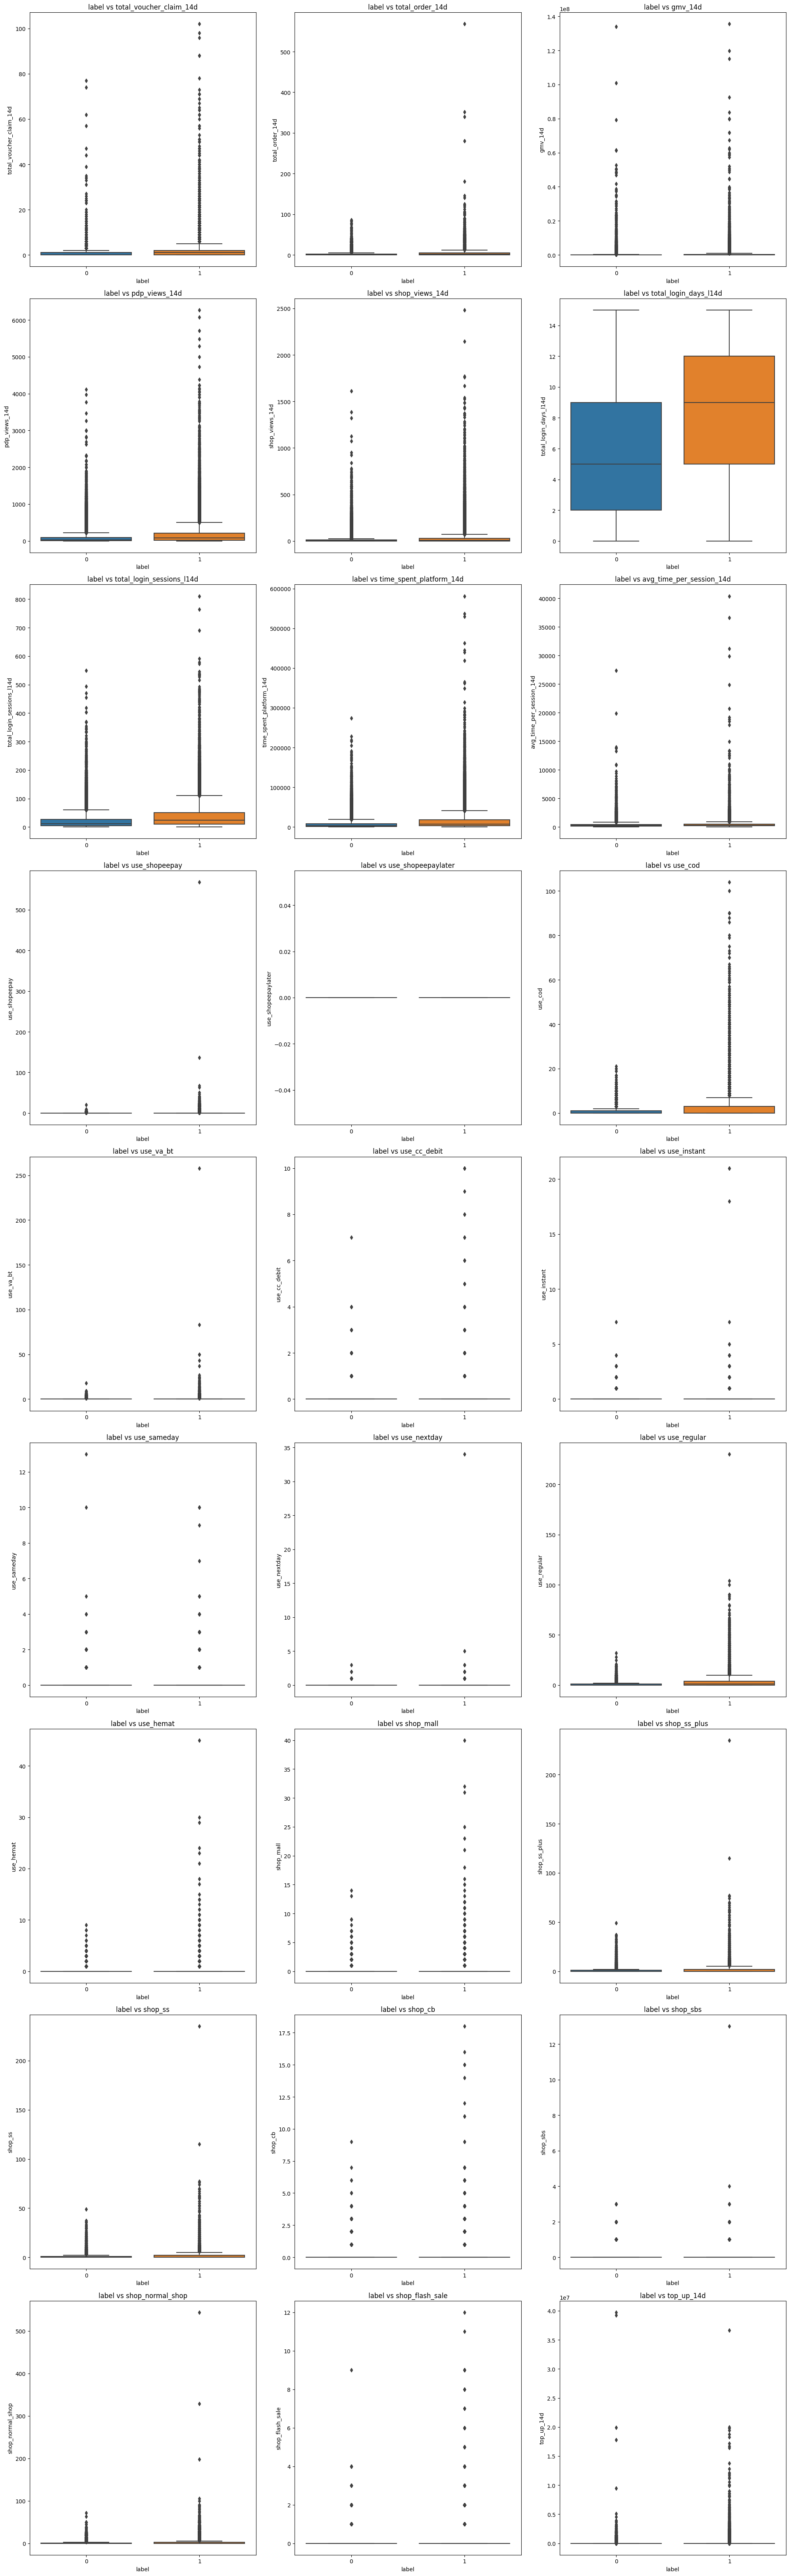

In [ ]:
#create boxplot to compare the distribution in a column based on the target label
plt.figure(figsize=(20, 65))

for i, col in enumerate(num_cols, 1):
    plt.subplot(9, 3, i)
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f'label vs {col}')

plt.tight_layout()
plt.show()

# Data Transformation

In [ ]:
#perform log transformation on right skewed data
skewed_cols=['total_voucher_claim_14d', 'total_order_14d',
       'gmv_14d', 'pdp_views_14d', 'shop_views_14d',
       'total_login_sessions_l14d', 'time_spent_platform_14d',
       'avg_time_per_session_14d', 'use_shopeepay', 'use_shopeepaylater',
       'use_cod', 'use_va_bt', 'use_cc_debit', 'use_instant', 'use_sameday',
       'use_nextday', 'use_regular', 'use_hemat', 'shop_mall', 'shop_ss_plus',
       'shop_ss', 'shop_cb', 'shop_sbs', 'shop_normal_shop', 'shop_flash_sale', 'top_up_14d']

for cols in skewed_cols:
    df[cols] = np.log1p(df[cols])

print(df[skewed_cols].describe())

       total_voucher_claim_14d  total_order_14d        gmv_14d  pdp_views_14d  \
count            222378.000000    222378.000000  222378.000000  222378.000000   
mean                  0.555373         0.848556       7.907828       3.700795   
std                   0.595774         0.768302       5.711894       1.688696   
min                   0.000000         0.000000       0.000000       0.000000   
25%                   0.000000         0.000000       0.000000       2.564949   
50%                   0.693147         0.693147      10.950824       3.891820   
75%                   0.693147         1.386294      12.297287       4.969813   
max                   4.634729         6.343880      18.724645       8.743691   

       shop_views_14d  total_login_sessions_l14d  time_spent_platform_14d  \
count   222378.000000              222378.000000            222378.000000   
mean         1.787242                   2.790923                 8.323043   
std          1.549399                  

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


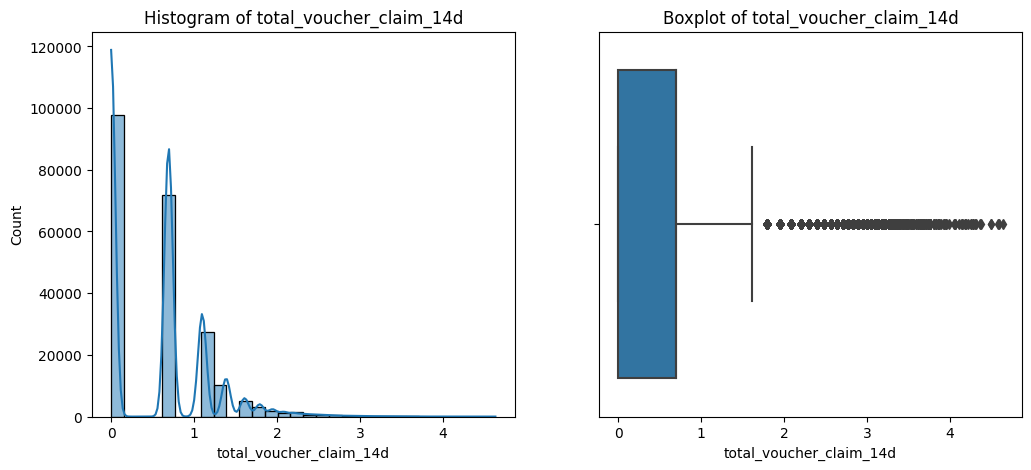

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


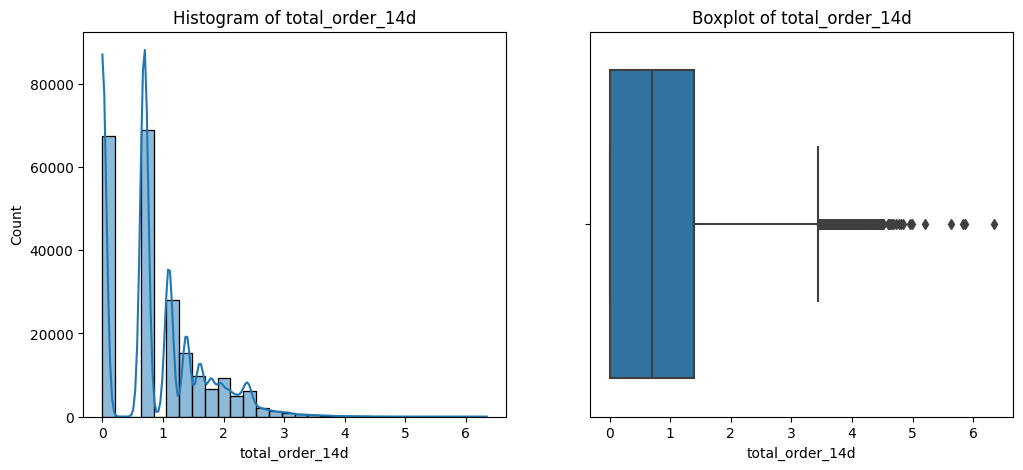

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


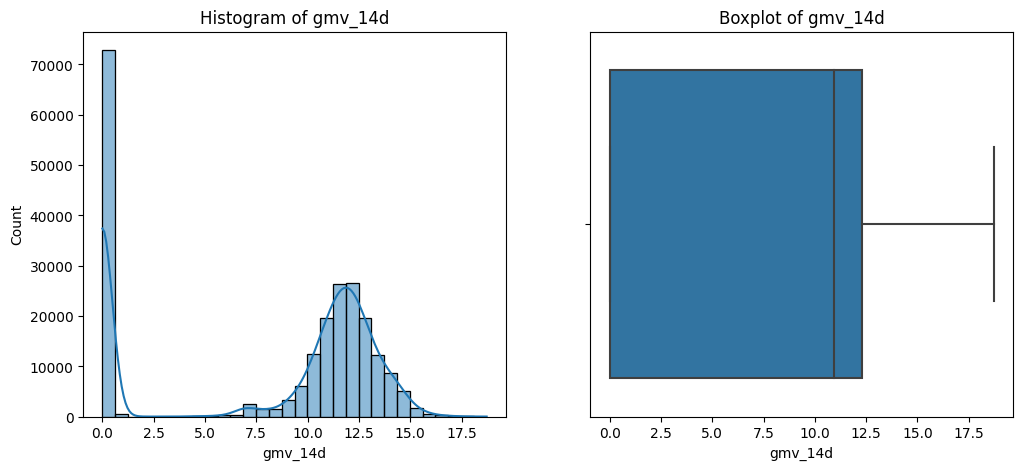

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


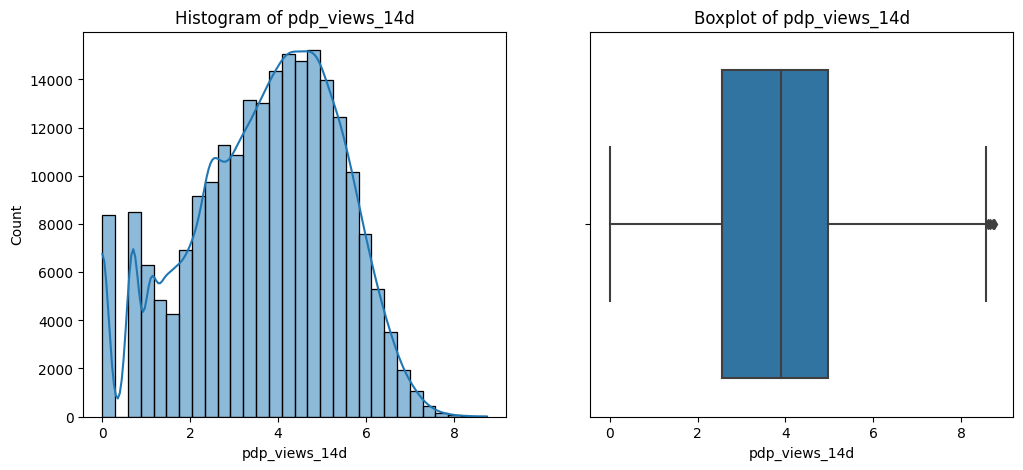

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


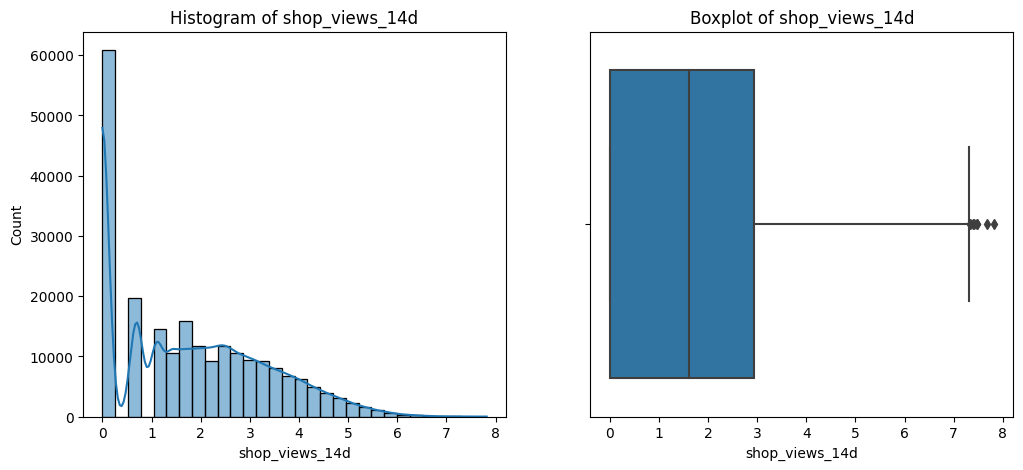

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


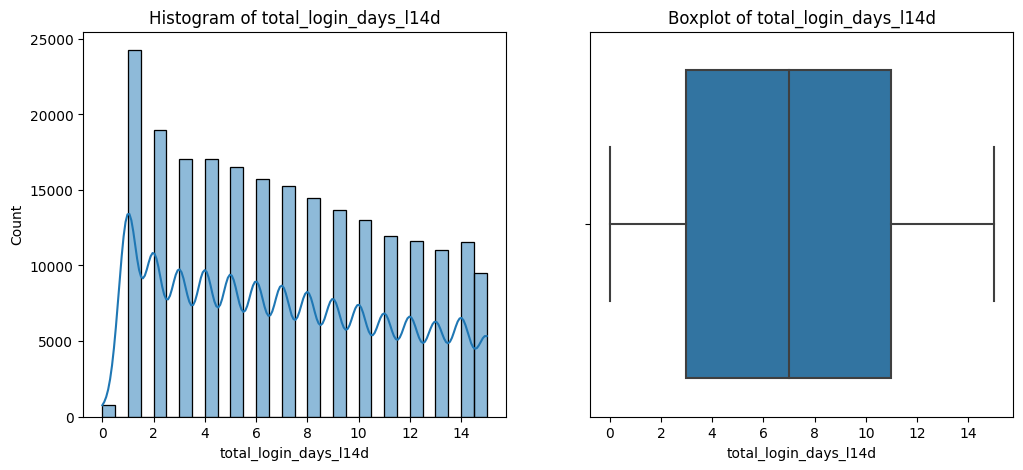

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


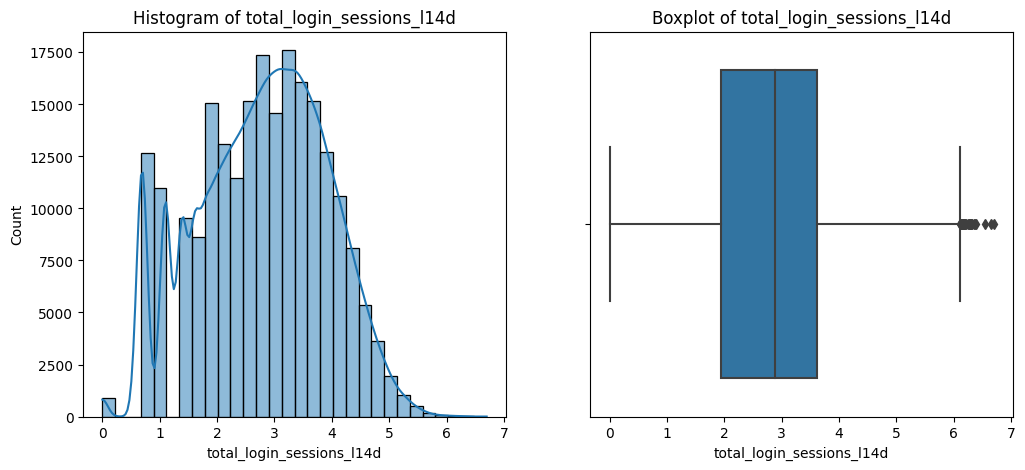

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


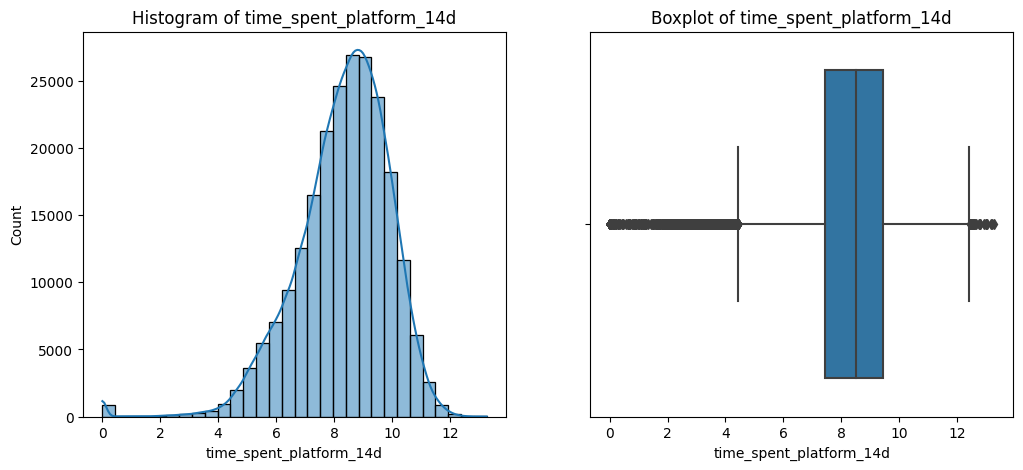

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


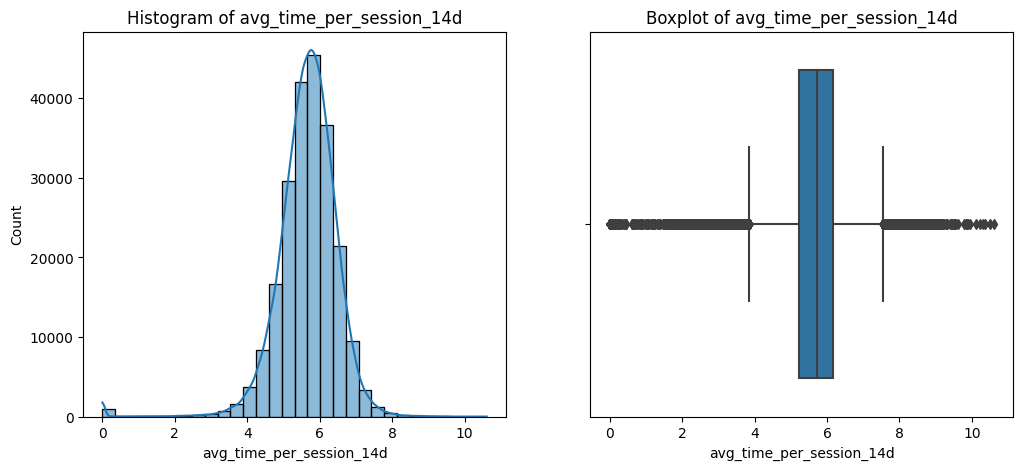

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


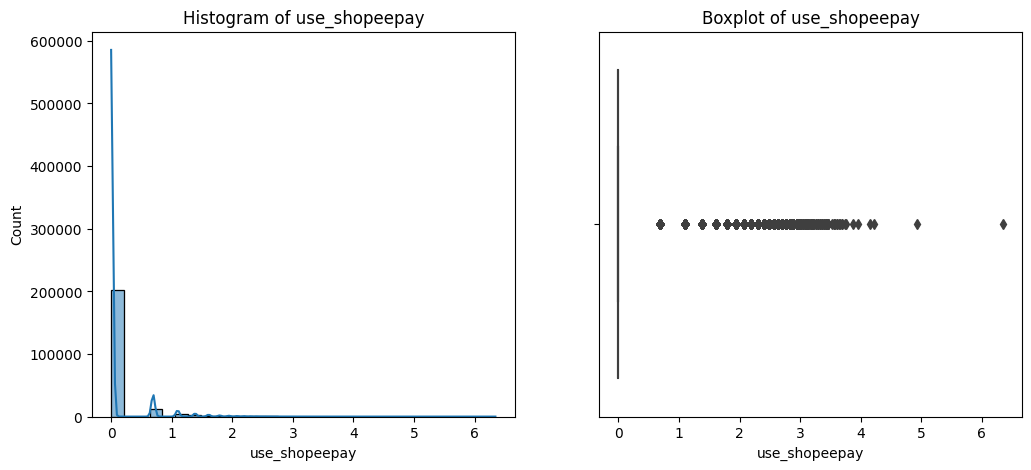

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


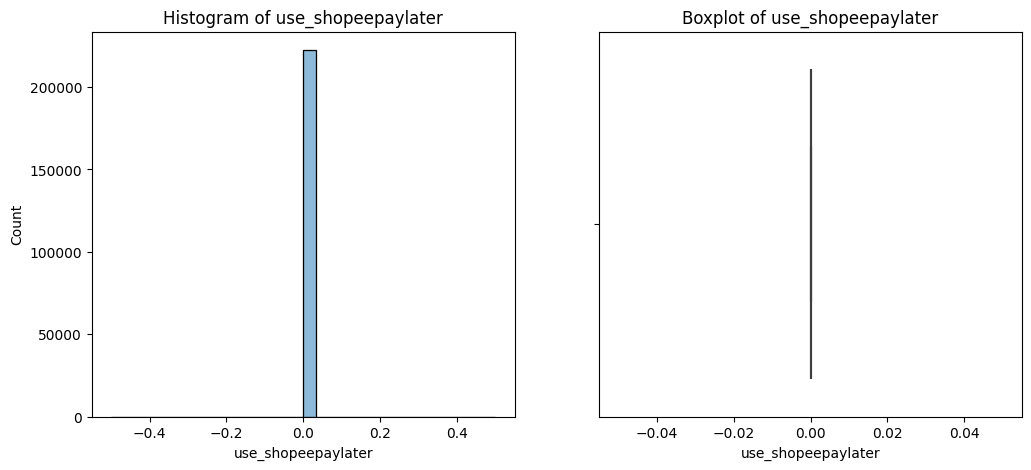

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


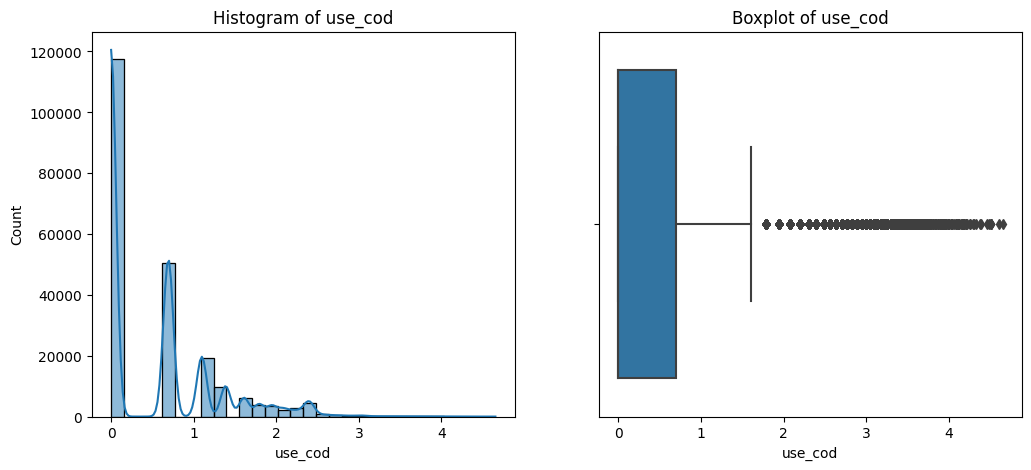

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


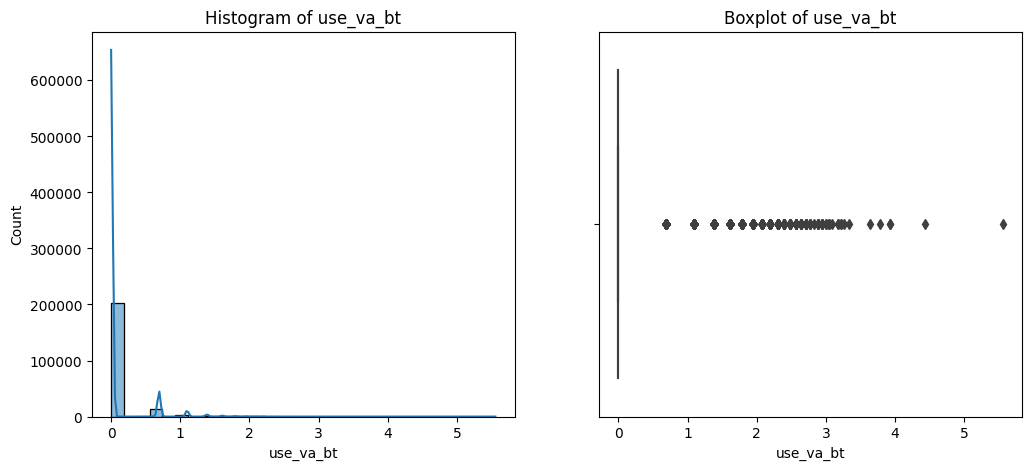

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


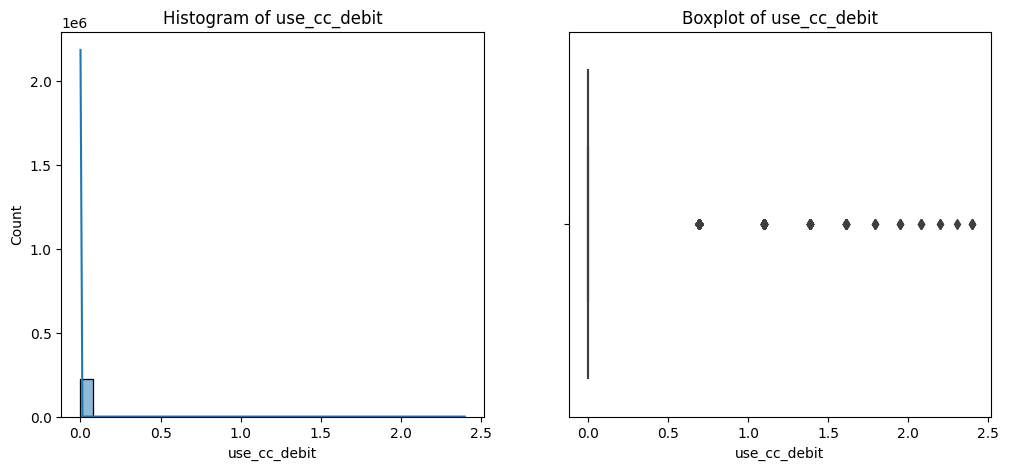

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


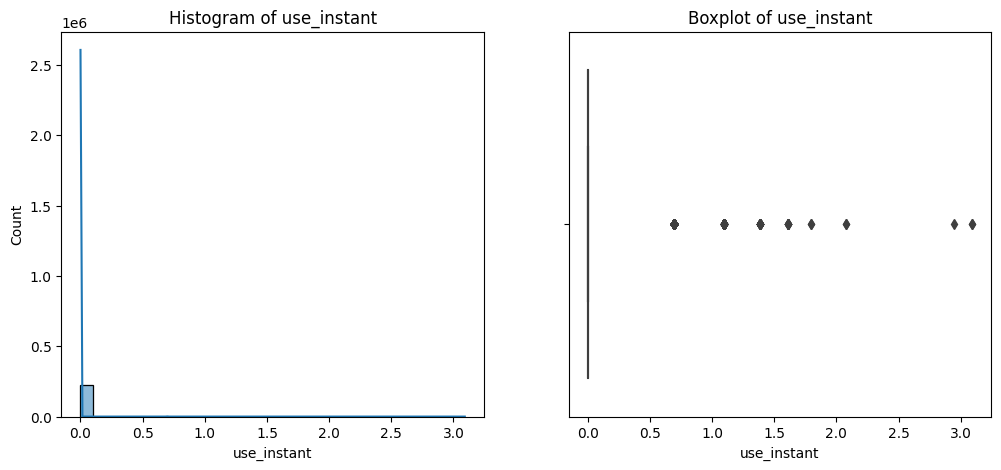

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


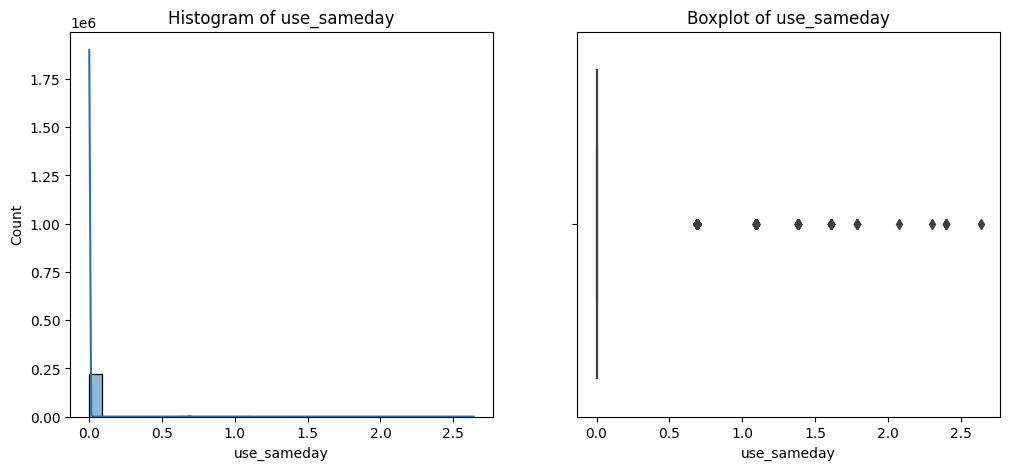

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


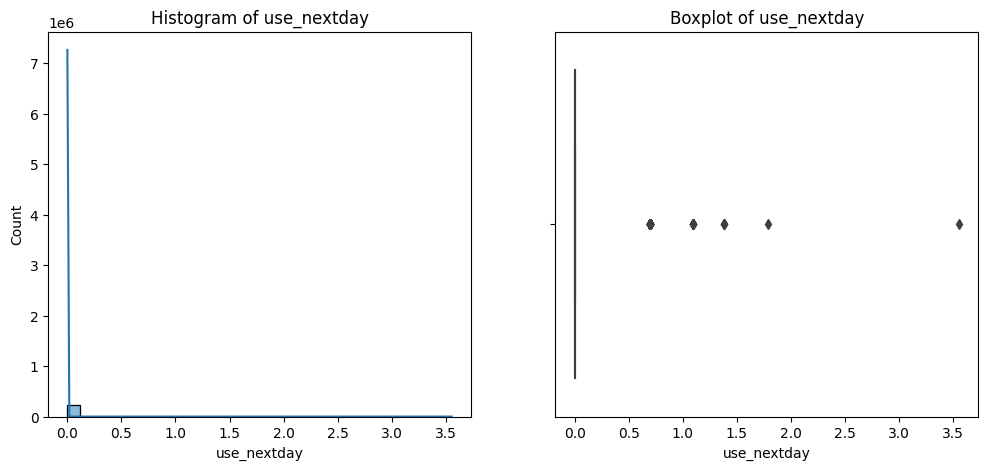

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


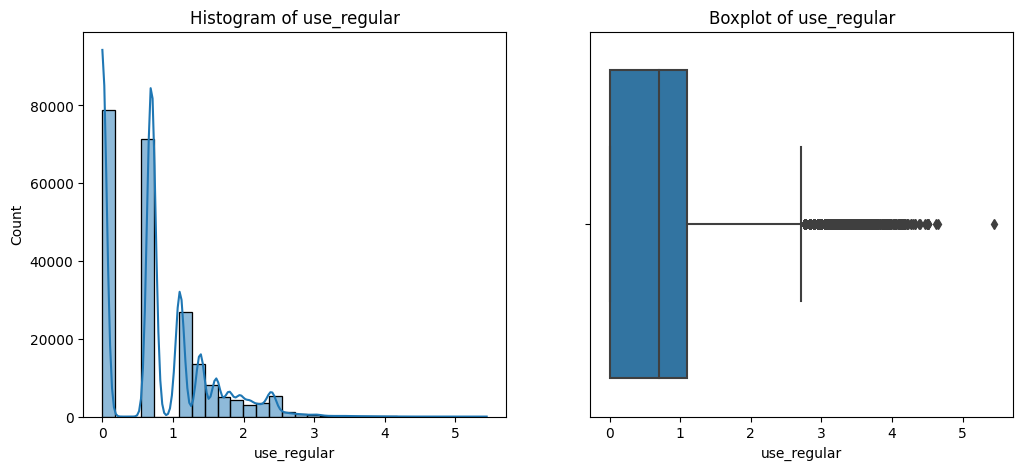

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


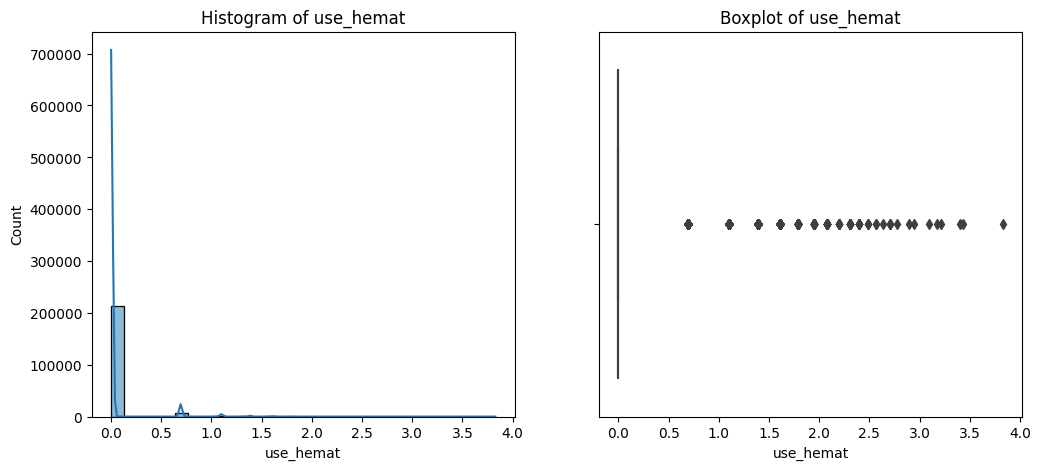

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


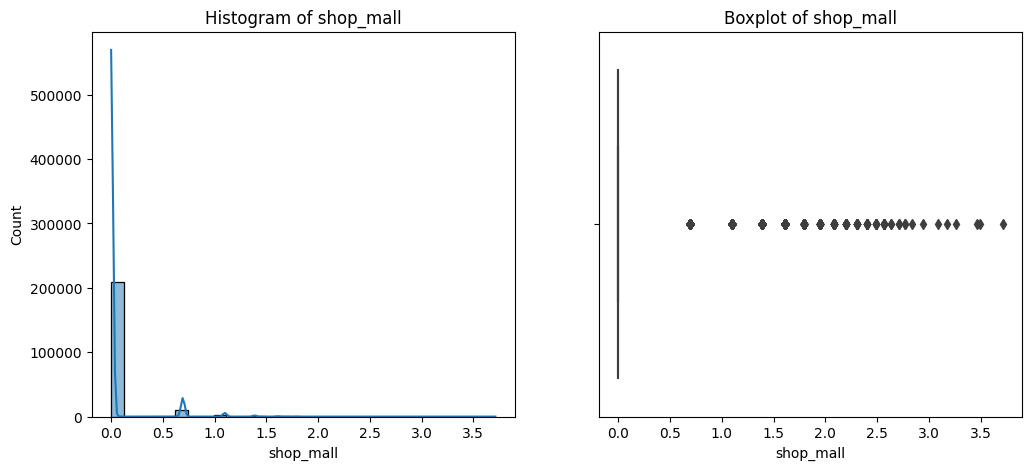

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


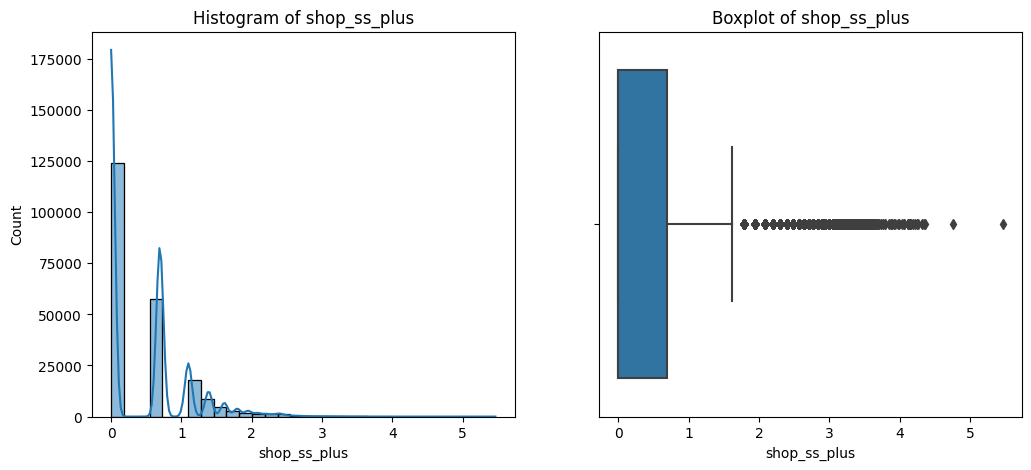

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


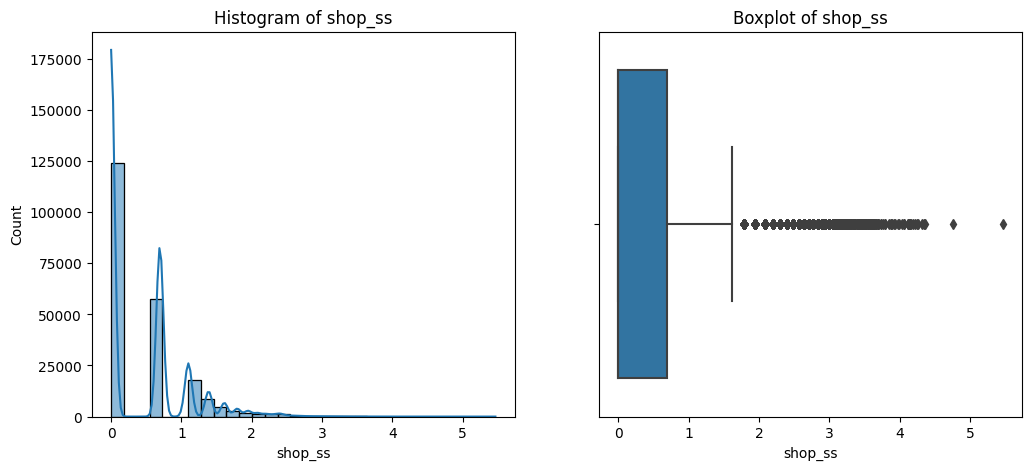

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


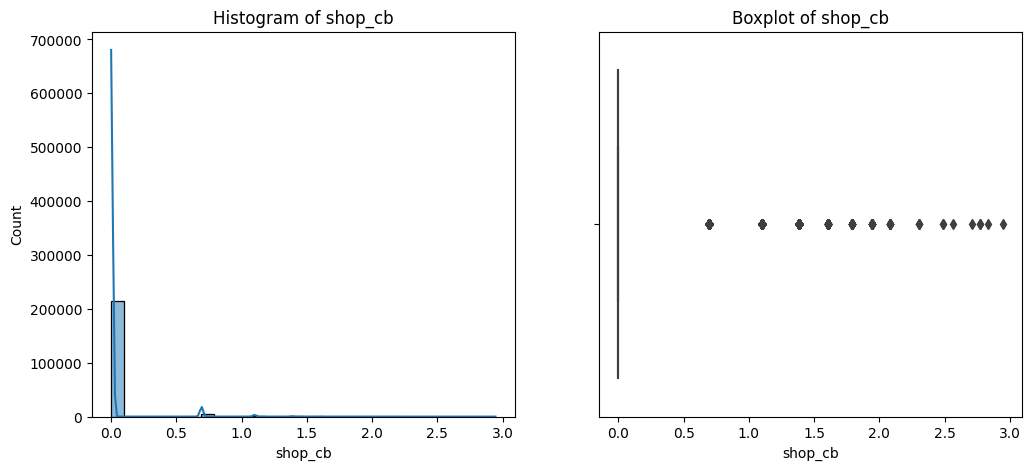

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


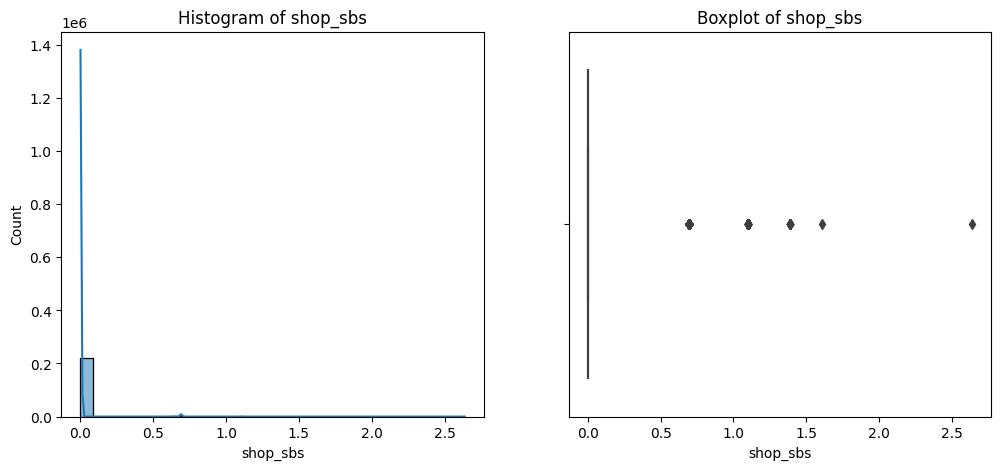

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


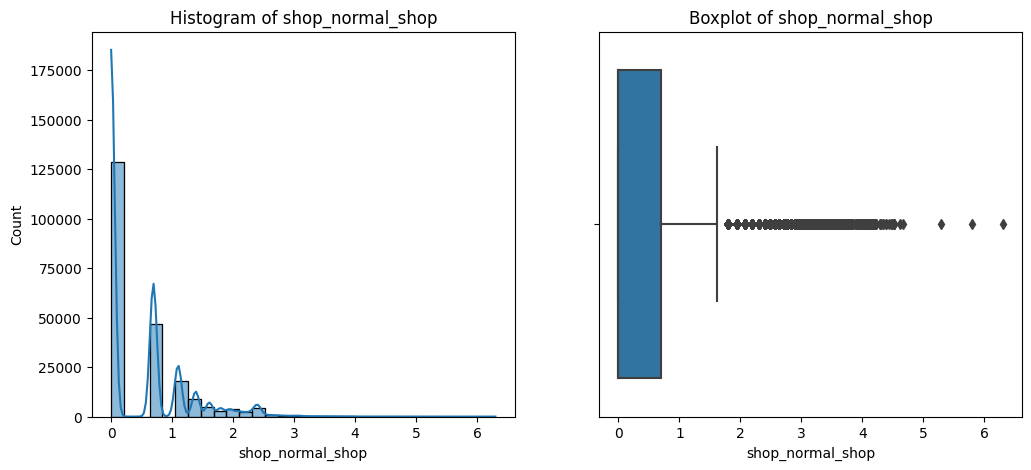

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


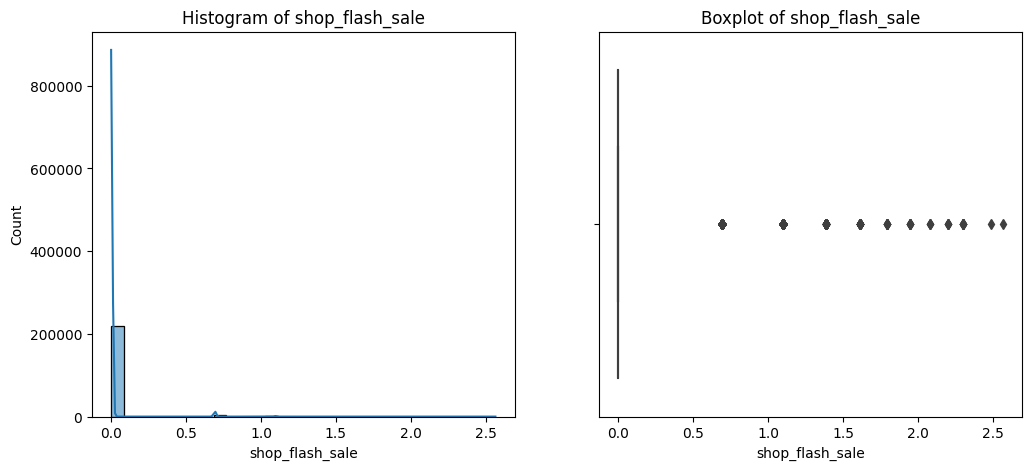

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


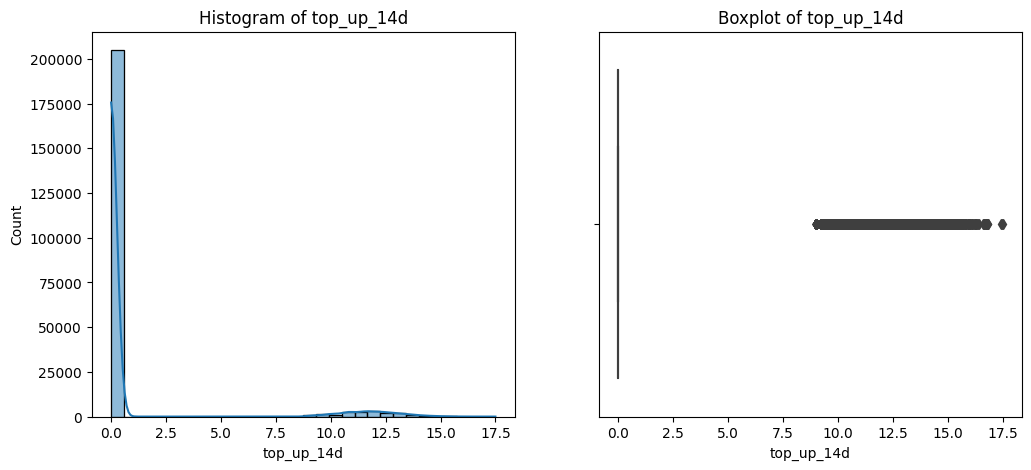

In [ ]:
#check how log transormation affect the data
for col in num_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

In [ ]:
#drop unwanted columns
df = df.drop(['age_group','new_buyer_initiative', 'use_shopeepaylater'], axis=1)
cat_cols.remove('age_group')
cat_cols.remove('new_buyer_initiative')
num_cols.remove('use_shopeepaylater')

In [ ]:
#perform one-hot encoding and standardization
binary_cat_cols = [col for col in cat_cols if df[col].nunique() == 2]
multi_cat_cols = [col for col in cat_cols if col not in binary_cat_cols]

lb = LabelBinarizer()
df['is_rural_or_urban'] = lb.fit_transform(df['is_rural_or_urban'])

ohe = OneHotEncoder(sparse_output=False)
ohe_df = pd.DataFrame(ohe.fit_transform(df[multi_cat_cols]), columns=ohe.get_feature_names_out(multi_cat_cols))

scaler = StandardScaler()
scaled_num_df = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

df_transformed = pd.concat([scaled_num_df, df[binary_cat_cols], ohe_df, df['label']], axis=1)

In [ ]:
df_transformed.columns

Index(['total_voucher_claim_14d', 'total_order_14d', 'gmv_14d',
       'pdp_views_14d', 'shop_views_14d', 'total_login_days_l14d',
       'total_login_sessions_l14d', 'time_spent_platform_14d',
       'avg_time_per_session_14d', 'use_shopeepay', 'use_cod', 'use_va_bt',
       'use_cc_debit', 'use_instant', 'use_sameday', 'use_nextday',
       'use_regular', 'use_hemat', 'shop_mall', 'shop_ss_plus', 'shop_ss',
       'shop_cb', 'shop_sbs', 'shop_normal_shop', 'shop_flash_sale',
       'top_up_14d', 'is_rural_or_urban', 'is_buyer_14d', 'is_dp_buyer_14d',
       'activate_shopeepay', 'gender_Female', 'gender_Male', 'gender_Unknown',
       'region_Jabodetabek', 'region_Java non Jabodetabek', 'region_Non Java',
       'label'],
      dtype='object')

In [ ]:
cat_cols = ['is_rural_or_urban', 'is_buyer_14d', 'is_dp_buyer_14d',
       'activate_shopeepay', 'gender_Female', 'gender_Male', 'gender_Unknown',
       'region_Jabodetabek', 'region_Java non Jabodetabek', 'region_Non Java']

# Feature Selection

In [ ]:
#vif test
def calculate_vif(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index=data.columns)
  return vif

vif = calculate_vif(df_transformed)
print(vif)

/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


total_voucher_claim_14d          2.133062
total_order_14d                 44.149053
gmv_14d                         10.624755
pdp_views_14d                    5.179711
shop_views_14d                   2.132683
total_login_days_l14d            4.956576
total_login_sessions_l14d      197.630806
time_spent_platform_14d        296.543292
avg_time_per_session_14d        76.114898
use_shopeepay                    2.994318
use_cod                          5.371177
use_va_bt                        1.373130
use_cc_debit                     1.012766
use_instant                      1.039161
use_sameday                      1.052135
use_nextday                      1.005128
use_regular                     13.677936
use_hemat                        1.272170
shop_mall                        1.611933
shop_ss_plus                          inf
shop_ss                               inf
shop_cb                          1.321833
shop_sbs                         1.079121
shop_normal_shop                13

In [ ]:
df_transformed = df_transformed.drop(['total_login_sessions_l14d','shop_ss_plus','use_regular','shop_normal_shop'],axis=1)

In [ ]:
vif = calculate_vif(df_transformed)
print(vif)

/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


total_voucher_claim_14d         1.993907
total_order_14d                 7.089503
gmv_14d                         9.922037
pdp_views_14d                   5.083377
shop_views_14d                  2.087139
total_login_days_l14d           4.563131
time_spent_platform_14d        10.602199
avg_time_per_session_14d        3.080857
use_shopeepay                   2.821213
use_cod                         3.248939
use_va_bt                       1.315594
use_cc_debit                    1.011787
use_instant                     1.031714
use_sameday                     1.042935
use_nextday                     1.004024
use_hemat                       1.131590
shop_mall                       1.154743
shop_ss                         2.209142
shop_cb                         1.057377
shop_sbs                        1.022399
shop_flash_sale                 1.075702
top_up_14d                      2.305597
is_rural_or_urban               1.120093
is_buyer_14d                    7.500359
is_dp_buyer_14d 

In [ ]:
#chi-square test
chi_scores = chi2(df_transformed[cat_cols], df_transformed['label'])
chi_scores_df = pd.DataFrame({'Feature': cat_cols, "Chi2 Score": chi_scores[0], "P-value": chi_scores[1]})
chi_scores_df = chi_scores_df.sort_values(by="Chi2 Score", ascending=False)
print(chi_scores_df)

                       Feature   Chi2 Score        P-value
3           activate_shopeepay  7190.186747   0.000000e+00
6               gender_Unknown  5398.996613   0.000000e+00
4                gender_Female  1265.723526  3.177288e-277
2              is_dp_buyer_14d   554.348443  1.425719e-122
8  region_Java non Jabodetabek   332.802547   2.357201e-74
9              region_Non Java   173.884571   1.049040e-39
7           region_Jabodetabek    98.528390   3.203983e-23
5                  gender_Male    71.878989   2.288073e-17
1                 is_buyer_14d     8.400153   3.751895e-03
0            is_rural_or_urban     7.274113   6.995543e-03


In [ ]:
#mutual information
cols = list(df_transformed.columns)
cols.remove('label')

mi_scores = mutual_info_classif(df_transformed.drop(columns=['label']), df_transformed['label'])
mi_scores_df = pd.DataFrame({"Feature": cols, "Mutual Information": mi_scores})
mi_scores_df = mi_scores_df.sort_values(by="Mutual Information", ascending=False)
print(mi_scores_df)

                        Feature  Mutual Information
1               total_order_14d            0.065071
9                       use_cod            0.060014
25           activate_shopeepay            0.058750
2                       gmv_14d            0.052811
5         total_login_days_l14d            0.049468
3                 pdp_views_14d            0.046316
6       time_spent_platform_14d            0.045053
0       total_voucher_claim_14d            0.042607
4                shop_views_14d            0.034692
17                      shop_ss            0.031746
26                gender_Female            0.026774
23                 is_buyer_14d            0.023417
22            is_rural_or_urban            0.021435
8                 use_shopeepay            0.020462
21                   top_up_14d            0.019276
30  region_Java non Jabodetabek            0.017705
28               gender_Unknown            0.013866
10                    use_va_bt            0.011486
27          

In [ ]:
#embedding method
rf = RandomForestClassifier()
rf.fit(df_transformed.drop(columns=['label']), df_transformed['label'])
importances = rf.feature_importances_

importance_df = pd.DataFrame({"Feature": cols, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

                        Feature  Importance
6       time_spent_platform_14d    0.149455
7      avg_time_per_session_14d    0.136191
3                 pdp_views_14d    0.121803
5         total_login_days_l14d    0.081933
4                shop_views_14d    0.078918
2                       gmv_14d    0.073341
25           activate_shopeepay    0.066262
1               total_order_14d    0.055686
9                       use_cod    0.051839
0       total_voucher_claim_14d    0.045599
17                      shop_ss    0.022176
22            is_rural_or_urban    0.013204
28               gender_Unknown    0.012082
21                   top_up_14d    0.011484
8                 use_shopeepay    0.008434
30  region_Java non Jabodetabek    0.008077
31              region_Non Java    0.008010
10                    use_va_bt    0.007626
26                gender_Female    0.007586
23                 is_buyer_14d    0.006811
27                  gender_Male    0.006728
29           region_Jabodetabek 

In [ ]:
#fixing columns to used
fix_cols = ['total_voucher_claim_14d', 'total_order_14d', 'gmv_14d',
       'pdp_views_14d', 'shop_views_14d', 'total_login_days_l14d',
       'time_spent_platform_14d',
       'avg_time_per_session_14d',
       'use_cod', 'shop_ss',
       'top_up_14d',
       'activate_shopeepay',
       'label']
del_cols = [col for col in df_transformed.columns if col not in fix_cols]

In [ ]:
final_df = df_transformed.drop(del_cols, axis=1)

# Modelling

In [ ]:
#data splitting
X = final_df.drop('label', axis=1)
y = final_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kNN without tuning

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

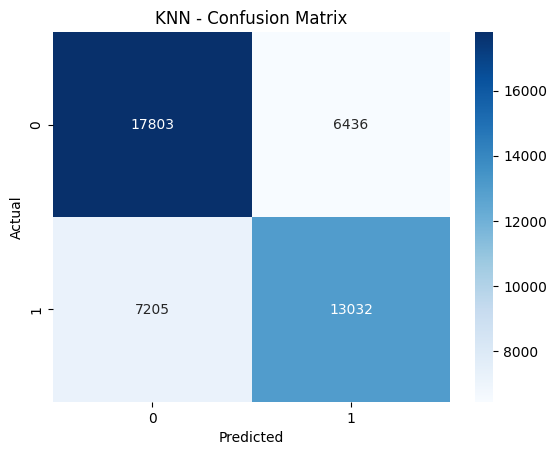

KNN - Classification Report
              precision    recall  f1-score   support

           0       0.71      0.73      0.72     24239
           1       0.67      0.64      0.66     20237

    accuracy                           0.69     44476
   macro avg       0.69      0.69      0.69     44476
weighted avg       0.69      0.69      0.69     44476



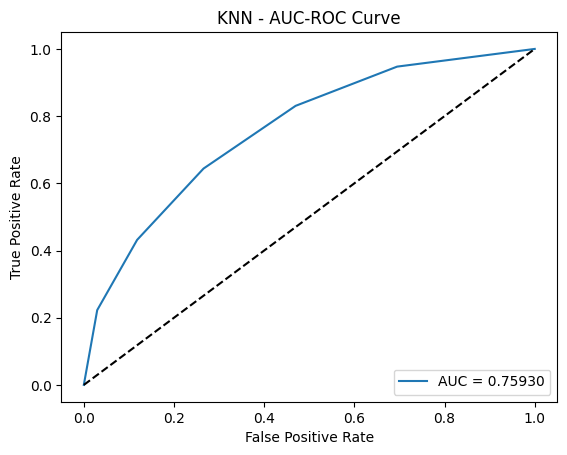

In [ ]:
y_pred = knn_model.predict(X_test)
y_prob = knn_model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('KNN - Classification Report')
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.5f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN - AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()

XGBoost without tuning

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

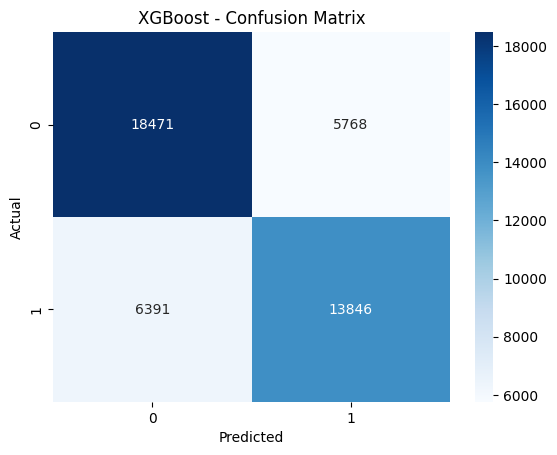

XGBoost - Classification Report
              precision    recall  f1-score   support

           0       0.74      0.76      0.75     24239
           1       0.71      0.68      0.69     20237

    accuracy                           0.73     44476
   macro avg       0.72      0.72      0.72     44476
weighted avg       0.73      0.73      0.73     44476



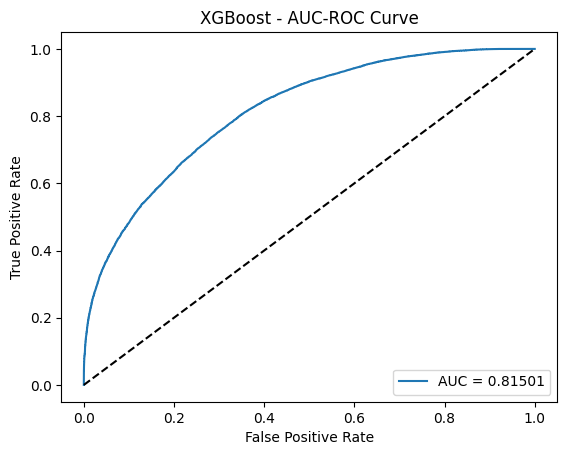

In [ ]:
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('XGBoost - Classification Report')
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.5f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()

Multilayer Perceptron without tuning

In [ ]:
def create_mlp_model(learning_rate=0.001, layers=[128, 64], activation='relu'):
    model = Sequential()
    model.add(Dense(layers[0], input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(layers[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

mlp_model = create_mlp_model()
mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1724327777.968897      34 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


Epoch 1/10


I0000 00:00:1724327777.969409      34 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724327778.175560      34 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724327778.175925      34 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724327778.176180      34 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

 111/4448 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.6356 - loss: 0.6158

I0000 00:00:1724327780.849535     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4448/4448 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7103 - loss: 0.5391 - val_accuracy: 0.7208 - val_loss: 0.5179
Epoch 2/10
4448/4448 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7217 - loss: 0.5179 - val_accuracy: 0.7180 - val_loss: 0.5168
Epoch 3/10
4448/4448 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7242 - loss: 0.5162 - val_accuracy: 0.7251 - val_loss: 0.5146
Epoch 4/10
4448/4448 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7252 - loss: 0.5142 - val_accuracy: 0.7236 - val_loss: 0.5138
Epoch 5/10
4448/4448 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7286 - loss: 0.5104 - val_accuracy: 0.7253 - val_loss: 0.5116
Epoch 6/10
4448/4448 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7237 - loss: 0.5162 - val_accuracy: 0.7255 - val_loss: 0.5130
Epoch 7/10
4448/4448 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7253 - loss: 0.5136 - val_accuracy: 0.7252 - val_loss: 0.5115
Epoch 8/10
4448/4448 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7258 - loss: 0.5121 - val_accura

1390/1390 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


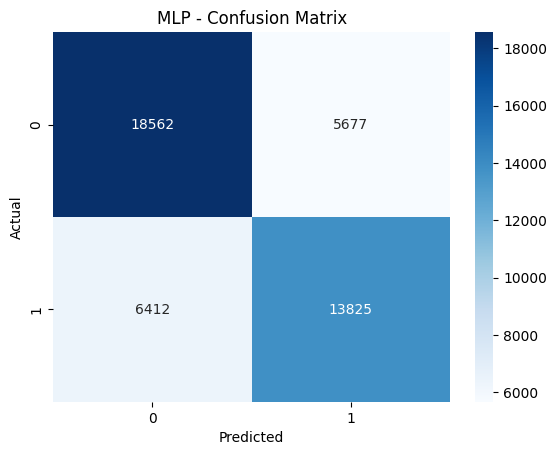

MLP - Classification Report
              precision    recall  f1-score   support

           0       0.74      0.77      0.75     24239
           1       0.71      0.68      0.70     20237

    accuracy                           0.73     44476
   macro avg       0.73      0.72      0.73     44476
weighted avg       0.73      0.73      0.73     44476



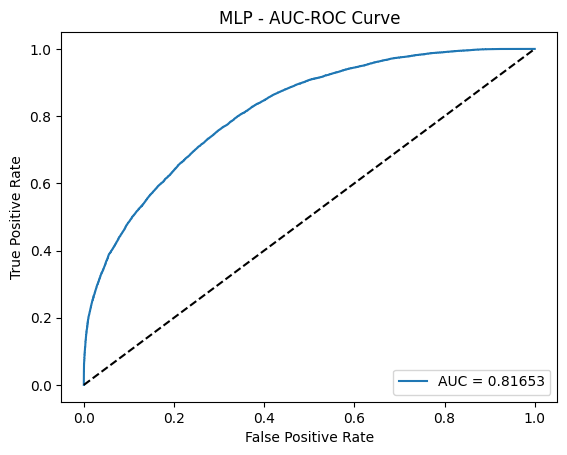

In [ ]:
y_pred = (mlp_model.predict(X_test) > 0.5).astype("int32")
y_prob = mlp_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('MLP - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('MLP - Classification Report')
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.5f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()

kNN with tuning

In [ ]:
knn_param_grid = {'n_neighbors': [3, 5, 7, 9],
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan', 'minkowski']}

knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
knn_grid.fit(X_train, y_train)

print(f"Best hyperparameter: {knn_grid.best_params_}")
knn_best = knn_grid.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best hyperparameter: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}


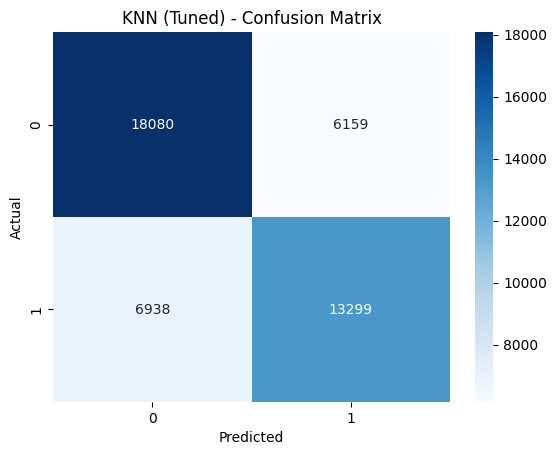

KNN (Tuned) - Classification Report
              precision    recall  f1-score   support

           0       0.72      0.75      0.73     24239
           1       0.68      0.66      0.67     20237

    accuracy                           0.71     44476
   macro avg       0.70      0.70      0.70     44476
weighted avg       0.70      0.71      0.70     44476



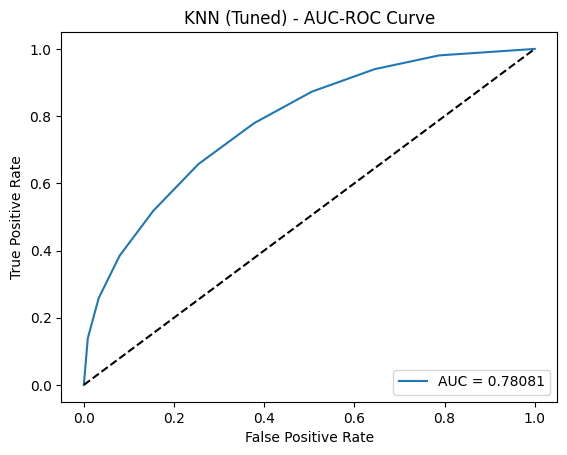

In [ ]:
y_pred = knn_best.predict(X_test)
y_prob = knn_best.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN (Tuned) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('KNN (Tuned) - Classification Report')
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.5f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN (Tuned) - AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()

XGBoost without tuning

In [ ]:
xgb_param_grid = {'n_estimators': [50, 100, 200],
                  'learning_rate': [0.01, 0.1, 0.3],
                  'max_depth': [3, 5, 7, 10]}

xgb_grid = GridSearchCV(xgb.XGBClassifier(random_state=42), xgb_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print(f"Best hyperparameter: {xgb_grid.best_params_}")
xgb_best = xgb_grid.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameter: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


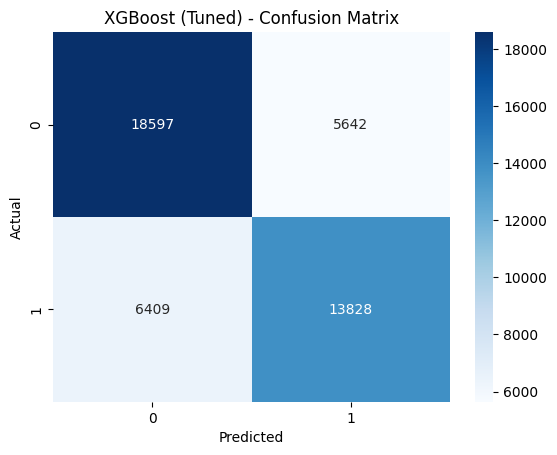

XGBoost (Tuned) - Classification Report
              precision    recall  f1-score   support

           0       0.74      0.77      0.76     24239
           1       0.71      0.68      0.70     20237

    accuracy                           0.73     44476
   macro avg       0.73      0.73      0.73     44476
weighted avg       0.73      0.73      0.73     44476



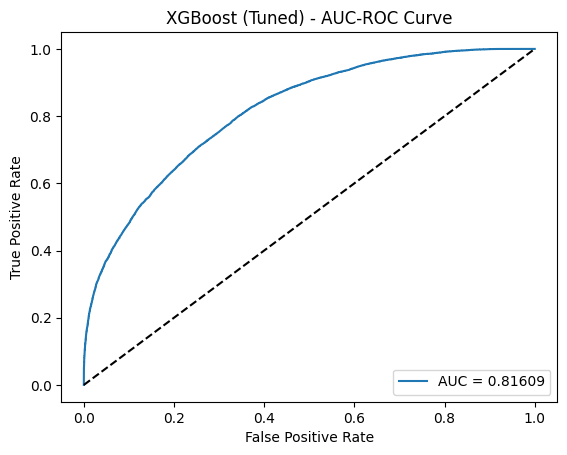

In [ ]:
y_pred = xgb_best.predict(X_test)
y_prob = xgb_best.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost (Tuned) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('XGBoost (Tuned) - Classification Report')
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.5f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost (Tuned) - AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()

Multilayer Perceptron with tuning

In [ ]:
mlp_param_grid = {
    'model__layers': [[128, 64], [64, 32], [128, 32]],
    'model__learning_rate': [0.001, 0.01],
    'batch_size': [32, 64],
    'epochs': [10, 20]}

mlp_grid = GridSearchCV(estimator=KerasClassifier(build_fn=create_mlp_model,epochs=10,batch_size=32), param_grid=mlp_param_grid, cv=3, scoring='accuracy', verbose=1)
mlp_grid.fit(X_train, y_train)

print(f"Best hyperparameter: {mlp_grid.best_params_}")
mlp_best = mlp_grid.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7075 - loss: 0.5436
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7251 - loss: 0.5156
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7213 - loss: 0.5168
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7250 - loss: 0.5137
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7256 - loss: 0.5111
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7255 - loss: 0.5136
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7270 - loss: 0.5114
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7250 - loss: 0.5126
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7257 - loss: 0.5125
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7278 - loss: 0.5095
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7095 - loss: 0.5402
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7225 - loss: 0.5177
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7236 - loss: 0.5131
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7256 - loss: 0.5120
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7257 - loss: 0.5108
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7261 - loss: 0.5113
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7250 - loss: 0.5120
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7294 - loss: 0.5063
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7278 - loss: 0.5089
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7254 - loss: 0.5099
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7089 - loss: 0.5415
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7228 - loss: 0.5181
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7224 - loss: 0.5175
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7254 - loss: 0.5135
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7253 - loss: 0.5140
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7255 - loss: 0.5139
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7249 - loss: 0.5148
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7270 - loss: 0.5109
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7270 - loss: 0.5113
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7266 - loss: 0.5119
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7107 - loss: 0.5395
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7170 - loss: 0.5244
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7201 - loss: 0.5223
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7196 - loss: 0.5229
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7224 - loss: 0.5172
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7214 - loss: 0.5209
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7208 - loss: 0.5171
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7223 - loss: 0.5164
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7206 - loss: 0.5196
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7226 - loss: 0.5175
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7107 - loss: 0.5401
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7202 - loss: 0.5224
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7214 - loss: 0.5187
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7242 - loss: 0.5163
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7237 - loss: 0.5182
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7202 - loss: 0.5174
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7224 - loss: 0.5190
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7244 - loss: 0.5153
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7260 - loss: 0.5128
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7223 - loss: 0.5159
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7117 - loss: 0.5389
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7208 - loss: 0.5232
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7210 - loss: 0.5220
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7201 - loss: 0.5218
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7226 - loss: 0.5186
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7229 - loss: 0.5184
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7222 - loss: 0.5173
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7230 - loss: 0.5173
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7239 - loss: 0.5163
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7224 - loss: 0.5179
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7045 - loss: 0.5461
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7199 - loss: 0.5197
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7250 - loss: 0.5177
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7229 - loss: 0.5163
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7225 - loss: 0.5150
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7239 - loss: 0.5157
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7227 - loss: 0.5156
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7255 - loss: 0.5139
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7238 - loss: 0.5143
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7263 - loss: 0.5126
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7054 - loss: 0.5486
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7233 - loss: 0.5175
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7243 - loss: 0.5143
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7245 - loss: 0.5142
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7242 - loss: 0.5130
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7241 - loss: 0.5121
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7266 - loss: 0.5105
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7270 - loss: 0.5093
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7267 - loss: 0.5113
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7268 - loss: 0.5085
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7048 - loss: 0.5476
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7210 - loss: 0.5182
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7218 - loss: 0.5166
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7216 - loss: 0.5177
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7263 - loss: 0.5139
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7260 - loss: 0.5122
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7300 - loss: 0.5065
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7259 - loss: 0.5130
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7281 - loss: 0.5115
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7268 - loss: 0.5115
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7115 - loss: 0.5396
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7169 - loss: 0.5248
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7197 - loss: 0.5205
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7200 - loss: 0.5225
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7220 - loss: 0.5194
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7209 - loss: 0.5198
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7213 - loss: 0.5182
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7195 - loss: 0.5187
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7208 - loss: 0.5193
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7232 - loss: 0.5161
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7110 - loss: 0.5384
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7213 - loss: 0.5217
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7194 - loss: 0.5216
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7218 - loss: 0.5186
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7223 - loss: 0.5171
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7220 - loss: 0.5180
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7226 - loss: 0.5160
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7233 - loss: 0.5157
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7240 - loss: 0.5143
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7242 - loss: 0.5151
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7078 - loss: 0.5401
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7176 - loss: 0.5229
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7236 - loss: 0.5196
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7224 - loss: 0.5188
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7252 - loss: 0.5160
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7235 - loss: 0.5185
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7238 - loss: 0.5174
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7236 - loss: 0.5197
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7243 - loss: 0.5147
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7253 - loss: 0.5172
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7061 - loss: 0.5464
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7204 - loss: 0.5187
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7214 - loss: 0.5183
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7229 - loss: 0.5160
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7223 - loss: 0.5171
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7256 - loss: 0.5117
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7256 - loss: 0.5131
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7257 - loss: 0.5132
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7249 - loss: 0.5116
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7265 - loss: 0.5114
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7059 - loss: 0.5440
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7199 - loss: 0.5197
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7255 - loss: 0.5154
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7220 - loss: 0.5147
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7224 - loss: 0.5139
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7247 - loss: 0.5132
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7260 - loss: 0.5125
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7264 - loss: 0.5090
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7270 - loss: 0.5091
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7258 - loss: 0.5105
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7082 - loss: 0.5442
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7236 - loss: 0.5182
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7236 - loss: 0.5169
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7264 - loss: 0.5121
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7257 - loss: 0.5138
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7249 - loss: 0.5140
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7257 - loss: 0.5134
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7256 - loss: 0.5129
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7262 - loss: 0.5118
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7263 - loss: 0.5119
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7076 - loss: 0.5434
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7206 - loss: 0.5223
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7208 - loss: 0.5226
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7212 - loss: 0.5203
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7212 - loss: 0.5200
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7212 - loss: 0.5191
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7240 - loss: 0.5180
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7227 - loss: 0.5191
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7247 - loss: 0.5175
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7243 - loss: 0.5183
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7109 - loss: 0.5377
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7194 - loss: 0.5221
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7217 - loss: 0.5203
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7218 - loss: 0.5191
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7244 - loss: 0.5170
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7211 - loss: 0.5182
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7223 - loss: 0.5164
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7257 - loss: 0.5140
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7231 - loss: 0.5177
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7220 - loss: 0.5156
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7103 - loss: 0.5391
Epoch 2/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7204 - loss: 0.5233
Epoch 3/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7200 - loss: 0.5191
Epoch 4/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7231 - loss: 0.5180
Epoch 5/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7224 - loss: 0.5182
Epoch 6/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7231 - loss: 0.5196
Epoch 7/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7217 - loss: 0.5185
Epoch 8/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7227 - loss: 0.5174
Epoch 9/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7208 - loss: 0.5202
Epoch 10/10
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7238 - loss: 0.5181
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7086 - loss: 0.5425
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7200 - loss: 0.5195
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7253 - loss: 0.5152
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7245 - loss: 0.5157
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7230 - loss: 0.5154
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7248 - loss: 0.5124
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7255 - loss: 0.5135
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7258 - loss: 0.5119
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7276 - loss: 0.5091
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7259 - loss: 0.5110
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7287 - loss: 0.5102
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7056 - loss: 0.5425
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7225 - loss: 0.5182
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7250 - loss: 0.5140
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7255 - loss: 0.5124
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7274 - loss: 0.5107
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7250 - loss: 0.5109
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7288 - loss: 0.5091
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7279 - loss: 0.5088
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7269 - loss: 0.5088
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7238 - loss: 0.5112
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7282 - loss: 0.5080
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7092 - loss: 0.5422
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7213 - loss: 0.5185
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7232 - loss: 0.5167
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7251 - loss: 0.5132
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7245 - loss: 0.5145
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7260 - loss: 0.5120
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7268 - loss: 0.5109
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7273 - loss: 0.5113
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7280 - loss: 0.5101
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7300 - loss: 0.5101
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7305 - loss: 0.5071
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7071 - loss: 0.5428
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7192 - loss: 0.5236
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7190 - loss: 0.5218
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7169 - loss: 0.5216
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7200 - loss: 0.5213
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7217 - loss: 0.5210
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7203 - loss: 0.5202
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7233 - loss: 0.5197
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7249 - loss: 0.5149
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7247 - loss: 0.5143
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7209 - loss: 0.5190
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7107 - loss: 0.5394
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7217 - loss: 0.5211
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7213 - loss: 0.5196
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7232 - loss: 0.5180
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7223 - loss: 0.5186
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7226 - loss: 0.5174
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7229 - loss: 0.5162
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7223 - loss: 0.5181
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7241 - loss: 0.5174
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7206 - loss: 0.5185
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7242 - loss: 0.5160
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7116 - loss: 0.5381
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7213 - loss: 0.5233
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7215 - loss: 0.5215
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7207 - loss: 0.5211
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7210 - loss: 0.5181
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7207 - loss: 0.5199
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7231 - loss: 0.5181
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7249 - loss: 0.5161
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7237 - loss: 0.5180
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7226 - loss: 0.5171
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7221 - loss: 0.5185
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7048 - loss: 0.5483
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7201 - loss: 0.5208
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7210 - loss: 0.5197
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7247 - loss: 0.5144
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7235 - loss: 0.5149
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7247 - loss: 0.5142
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7254 - loss: 0.5110
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7267 - loss: 0.5095
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7262 - loss: 0.5117
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7242 - loss: 0.5117
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7259 - loss: 0.5127
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7079 - loss: 0.5456
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7209 - loss: 0.5197
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7246 - loss: 0.5151
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7223 - loss: 0.5135
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7265 - loss: 0.5122
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7260 - loss: 0.5122
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7246 - loss: 0.5105
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7276 - loss: 0.5102
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7273 - loss: 0.5093
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7297 - loss: 0.5068
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7259 - loss: 0.5106
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7046 - loss: 0.5481
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7211 - loss: 0.5204
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7244 - loss: 0.5152
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7233 - loss: 0.5147
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7253 - loss: 0.5138
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7269 - loss: 0.5118
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7273 - loss: 0.5105
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7226 - loss: 0.5141
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7228 - loss: 0.5140
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7269 - loss: 0.5116
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7279 - loss: 0.5101
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7081 - loss: 0.5409
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7167 - loss: 0.5254
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7197 - loss: 0.5225
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7209 - loss: 0.5213
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7199 - loss: 0.5193
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7221 - loss: 0.5174
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7240 - loss: 0.5172
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7207 - loss: 0.5184
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7218 - loss: 0.5162
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7236 - loss: 0.5163
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7232 - loss: 0.5163
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7112 - loss: 0.5369
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7198 - loss: 0.5207
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7217 - loss: 0.5191
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7228 - loss: 0.5196
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7220 - loss: 0.5168
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7219 - loss: 0.5147
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7219 - loss: 0.5167
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7226 - loss: 0.5155
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7222 - loss: 0.5163
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7228 - loss: 0.5178
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7238 - loss: 0.5161
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7090 - loss: 0.5401
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7202 - loss: 0.5236
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7232 - loss: 0.5201
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7231 - loss: 0.5196
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7221 - loss: 0.5182
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7212 - loss: 0.5206
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7231 - loss: 0.5199
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7250 - loss: 0.5173
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7211 - loss: 0.5185
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7253 - loss: 0.5171
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7241 - loss: 0.5179
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7096 - loss: 0.5425
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7201 - loss: 0.5196
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7244 - loss: 0.5162
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7240 - loss: 0.5147
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7259 - loss: 0.5133
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7236 - loss: 0.5141
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7235 - loss: 0.5125
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7268 - loss: 0.5103
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7266 - loss: 0.5102
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7261 - loss: 0.5113
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7253 - loss: 0.5126
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7085 - loss: 0.5430
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7230 - loss: 0.5175
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7212 - loss: 0.5162
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7246 - loss: 0.5150
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7254 - loss: 0.5118
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7250 - loss: 0.5104
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7265 - loss: 0.5119
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7258 - loss: 0.5094
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7260 - loss: 0.5097
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7273 - loss: 0.5094
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7275 - loss: 0.5089
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7073 - loss: 0.5429
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7217 - loss: 0.5202
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7207 - loss: 0.5186
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7233 - loss: 0.5159
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7255 - loss: 0.5140
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7249 - loss: 0.5134
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7247 - loss: 0.5133
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7273 - loss: 0.5104
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7256 - loss: 0.5110
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7255 - loss: 0.5119
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7292 - loss: 0.5081
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7093 - loss: 0.5381
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7167 - loss: 0.5253
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7202 - loss: 0.5222
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7211 - loss: 0.5222
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7211 - loss: 0.5204
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7221 - loss: 0.5186
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7224 - loss: 0.5173
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7247 - loss: 0.5176
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7225 - loss: 0.5177
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7235 - loss: 0.5179
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7223 - loss: 0.5167
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7121 - loss: 0.5365
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7190 - loss: 0.5237
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7184 - loss: 0.5205
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7224 - loss: 0.5172
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7215 - loss: 0.5180
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7227 - loss: 0.5175
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7237 - loss: 0.5171
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7228 - loss: 0.5157
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7210 - loss: 0.5166
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7219 - loss: 0.5169
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7224 - loss: 0.5160
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3707/3707 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7112 - loss: 0.5411
Epoch 2/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7203 - loss: 0.5212
Epoch 3/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7203 - loss: 0.5218
Epoch 4/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7189 - loss: 0.5213
Epoch 5/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7234 - loss: 0.5199
Epoch 6/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7244 - loss: 0.5166
Epoch 7/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7249 - loss: 0.5175
Epoch 8/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7239 - loss: 0.5171
Epoch 9/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7237 - loss: 0.5182
Epoch 10/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7226 - loss: 0.5175
Epoch 11/20
3707/3707 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7235 - loss: 0.5181
Epoch 12/20
3707/3707 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7037 - loss: 0.5467
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7232 - loss: 0.5174
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7227 - loss: 0.5163
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7248 - loss: 0.5159
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7253 - loss: 0.5137
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7249 - loss: 0.5141
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7263 - loss: 0.5113
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7253 - loss: 0.5105
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7282 - loss: 0.5090
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7272 - loss: 0.5113
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7103 - loss: 0.5414
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7208 - loss: 0.5183
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7220 - loss: 0.5169
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7273 - loss: 0.5131
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7246 - loss: 0.5132
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7268 - loss: 0.5113
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7252 - loss: 0.5117
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7260 - loss: 0.5105
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7266 - loss: 0.5105
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7276 - loss: 0.5105
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7057 - loss: 0.5465
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7238 - loss: 0.5178
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7269 - loss: 0.5124
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7268 - loss: 0.5138
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7254 - loss: 0.5133
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7279 - loss: 0.5108
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7284 - loss: 0.5115
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7258 - loss: 0.5114
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7259 - loss: 0.5137
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7315 - loss: 0.5080
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7095 - loss: 0.5404
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7194 - loss: 0.5228
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7197 - loss: 0.5218
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7215 - loss: 0.5197
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7215 - loss: 0.5189
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7251 - loss: 0.5149
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7200 - loss: 0.5168
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7241 - loss: 0.5151
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7265 - loss: 0.5152
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7237 - loss: 0.5167
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7129 - loss: 0.5352
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7209 - loss: 0.5220
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7210 - loss: 0.5190
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7213 - loss: 0.5175
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7238 - loss: 0.5149
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7236 - loss: 0.5159
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7210 - loss: 0.5161
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7223 - loss: 0.5148
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7237 - loss: 0.5154
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7271 - loss: 0.5127
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7104 - loss: 0.5398
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7189 - loss: 0.5235
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7222 - loss: 0.5202
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7217 - loss: 0.5190
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7240 - loss: 0.5166
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7245 - loss: 0.5170
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7249 - loss: 0.5147
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7274 - loss: 0.5122
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7243 - loss: 0.5162
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7247 - loss: 0.5148
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6904 - loss: 0.5577
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7204 - loss: 0.5216
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7217 - loss: 0.5194
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7210 - loss: 0.5166
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7243 - loss: 0.5149
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7231 - loss: 0.5161
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7237 - loss: 0.5139
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7251 - loss: 0.5122
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7251 - loss: 0.5131
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7257 - loss: 0.5138
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7009 - loss: 0.5518
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7193 - loss: 0.5192
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7210 - loss: 0.5186
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7237 - loss: 0.5147
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7214 - loss: 0.5158
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7266 - loss: 0.5127
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7276 - loss: 0.5112
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7254 - loss: 0.5128
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7266 - loss: 0.5103
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7266 - loss: 0.5108
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6991 - loss: 0.5556
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7207 - loss: 0.5197
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7206 - loss: 0.5203
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7235 - loss: 0.5150
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7222 - loss: 0.5149
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7242 - loss: 0.5148
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7256 - loss: 0.5118
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7253 - loss: 0.5139
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7260 - loss: 0.5115
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7274 - loss: 0.5124
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7095 - loss: 0.5412
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7208 - loss: 0.5196
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7232 - loss: 0.5183
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7234 - loss: 0.5198
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7215 - loss: 0.5193
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7240 - loss: 0.5153
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7230 - loss: 0.5174
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7220 - loss: 0.5178
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7207 - loss: 0.5163
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7241 - loss: 0.5155
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7123 - loss: 0.5360
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7233 - loss: 0.5187
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7215 - loss: 0.5191
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7230 - loss: 0.5162
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7258 - loss: 0.5139
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7231 - loss: 0.5139
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7237 - loss: 0.5152
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7234 - loss: 0.5156
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7252 - loss: 0.5127
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7217 - loss: 0.5155
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7085 - loss: 0.5410
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7185 - loss: 0.5223
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7237 - loss: 0.5200
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7235 - loss: 0.5191
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7236 - loss: 0.5156
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7272 - loss: 0.5139
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7259 - loss: 0.5141
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7253 - loss: 0.5127
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7238 - loss: 0.5132
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7252 - loss: 0.5148
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7049 - loss: 0.5477
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7237 - loss: 0.5185
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7208 - loss: 0.5184
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7240 - loss: 0.5156
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7234 - loss: 0.5162
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7234 - loss: 0.5144
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7258 - loss: 0.5123
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7266 - loss: 0.5128
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7277 - loss: 0.5100
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7252 - loss: 0.5112
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7082 - loss: 0.5446
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7217 - loss: 0.5156
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7275 - loss: 0.5135
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7252 - loss: 0.5137
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7273 - loss: 0.5088
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7244 - loss: 0.5130
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7286 - loss: 0.5090
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7261 - loss: 0.5102
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7256 - loss: 0.5112
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7273 - loss: 0.5093
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7053 - loss: 0.5487
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7222 - loss: 0.5184
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7223 - loss: 0.5164
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7219 - loss: 0.5160
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7246 - loss: 0.5149
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7256 - loss: 0.5139
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7237 - loss: 0.5138
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7264 - loss: 0.5141
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7262 - loss: 0.5128
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7280 - loss: 0.5110
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7126 - loss: 0.5404
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7201 - loss: 0.5220
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7229 - loss: 0.5183
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7198 - loss: 0.5199
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7244 - loss: 0.5146
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7208 - loss: 0.5183
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7237 - loss: 0.5156
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7231 - loss: 0.5168
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7238 - loss: 0.5161
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7243 - loss: 0.5156
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7103 - loss: 0.5388
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7218 - loss: 0.5204
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7243 - loss: 0.5160
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7237 - loss: 0.5162
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7244 - loss: 0.5159
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7226 - loss: 0.5178
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7230 - loss: 0.5166
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7245 - loss: 0.5134
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7229 - loss: 0.5151
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7263 - loss: 0.5136
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7108 - loss: 0.5387
Epoch 2/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7200 - loss: 0.5221
Epoch 3/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7215 - loss: 0.5202
Epoch 4/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7201 - loss: 0.5183
Epoch 5/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7201 - loss: 0.5179
Epoch 6/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7237 - loss: 0.5152
Epoch 7/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7241 - loss: 0.5160
Epoch 8/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7221 - loss: 0.5187
Epoch 9/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7252 - loss: 0.5139
Epoch 10/10
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7237 - loss: 0.5176
927/927 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7053 - loss: 0.5470
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7225 - loss: 0.5176
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7234 - loss: 0.5159
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7230 - loss: 0.5160
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7245 - loss: 0.5151
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7253 - loss: 0.5126
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7243 - loss: 0.5133
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7255 - loss: 0.5116
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7242 - loss: 0.5120
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7271 - loss: 0.5108
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7267 - loss: 0.5102
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7070 - loss: 0.5446
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7221 - loss: 0.5168
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7263 - loss: 0.5122
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7266 - loss: 0.5118
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7248 - loss: 0.5121
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7234 - loss: 0.5124
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7261 - loss: 0.5104
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7281 - loss: 0.5095
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7267 - loss: 0.5079
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7257 - loss: 0.5104
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7292 - loss: 0.5079
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7037 - loss: 0.5485
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7231 - loss: 0.5191
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7249 - loss: 0.5143
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7244 - loss: 0.5157
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7238 - loss: 0.5159
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7247 - loss: 0.5146
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7253 - loss: 0.5117
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7218 - loss: 0.5137
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7265 - loss: 0.5108
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7270 - loss: 0.5117
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7276 - loss: 0.5102
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7075 - loss: 0.5418
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7192 - loss: 0.5227
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7208 - loss: 0.5211
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7219 - loss: 0.5172
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7218 - loss: 0.5173
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7230 - loss: 0.5162
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7210 - loss: 0.5166
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7220 - loss: 0.5159
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7236 - loss: 0.5147
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7251 - loss: 0.5150
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7209 - loss: 0.5169
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7108 - loss: 0.5376
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7205 - loss: 0.5203
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7212 - loss: 0.5187
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7178 - loss: 0.5201
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7210 - loss: 0.5178
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7215 - loss: 0.5151
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7231 - loss: 0.5169
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7219 - loss: 0.5147
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7239 - loss: 0.5140
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7234 - loss: 0.5144
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7244 - loss: 0.5139
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7114 - loss: 0.5374
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7215 - loss: 0.5211
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7198 - loss: 0.5190
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7242 - loss: 0.5175
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7229 - loss: 0.5191
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7231 - loss: 0.5179
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7238 - loss: 0.5189
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7242 - loss: 0.5136
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7204 - loss: 0.5186
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7216 - loss: 0.5155
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7258 - loss: 0.5132
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7002 - loss: 0.5544
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7201 - loss: 0.5208
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7210 - loss: 0.5193
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7246 - loss: 0.5145
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7242 - loss: 0.5150
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7234 - loss: 0.5142
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7249 - loss: 0.5134
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7256 - loss: 0.5134
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7234 - loss: 0.5140
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7261 - loss: 0.5127
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7246 - loss: 0.5108
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7008 - loss: 0.5503
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7221 - loss: 0.5187
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7228 - loss: 0.5165
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7260 - loss: 0.5137
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7248 - loss: 0.5130
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7243 - loss: 0.5141
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7255 - loss: 0.5109
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7257 - loss: 0.5113
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7286 - loss: 0.5093
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7278 - loss: 0.5095
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7297 - loss: 0.5084
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6979 - loss: 0.5569
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7236 - loss: 0.5209
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7225 - loss: 0.5182
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7246 - loss: 0.5162
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7247 - loss: 0.5156
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7263 - loss: 0.5126
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7254 - loss: 0.5140
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7246 - loss: 0.5156
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7248 - loss: 0.5142
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7279 - loss: 0.5110
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7261 - loss: 0.5108
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7051 - loss: 0.5434
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7221 - loss: 0.5203
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7215 - loss: 0.5205
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7206 - loss: 0.5208
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7224 - loss: 0.5162
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7237 - loss: 0.5161
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7242 - loss: 0.5161
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7232 - loss: 0.5167
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7238 - loss: 0.5163
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7228 - loss: 0.5161
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7272 - loss: 0.5137
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7132 - loss: 0.5389
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7189 - loss: 0.5222
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7205 - loss: 0.5192
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7237 - loss: 0.5165
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7195 - loss: 0.5189
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7244 - loss: 0.5134
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7260 - loss: 0.5122
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7237 - loss: 0.5142
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7233 - loss: 0.5145
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7227 - loss: 0.5164
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7245 - loss: 0.5149
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7074 - loss: 0.5410
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7200 - loss: 0.5210
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7228 - loss: 0.5193
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7252 - loss: 0.5163
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7213 - loss: 0.5197
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7244 - loss: 0.5166
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7244 - loss: 0.5188
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7259 - loss: 0.5148
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7219 - loss: 0.5174
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7251 - loss: 0.5150
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7248 - loss: 0.5150
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7043 - loss: 0.5468
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7180 - loss: 0.5215
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7231 - loss: 0.5165
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7210 - loss: 0.5172
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7227 - loss: 0.5150
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7240 - loss: 0.5137
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7231 - loss: 0.5143
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7263 - loss: 0.5120
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7262 - loss: 0.5122
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7270 - loss: 0.5103
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7263 - loss: 0.5107
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7081 - loss: 0.5460
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7232 - loss: 0.5165
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7270 - loss: 0.5123
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7247 - loss: 0.5134
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7259 - loss: 0.5119
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7264 - loss: 0.5104
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7259 - loss: 0.5112
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7281 - loss: 0.5101
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7275 - loss: 0.5101
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7253 - loss: 0.5100
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7266 - loss: 0.5088
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7051 - loss: 0.5484
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7228 - loss: 0.5194
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7233 - loss: 0.5169
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7230 - loss: 0.5154
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7276 - loss: 0.5126
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7235 - loss: 0.5129
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7235 - loss: 0.5136
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7240 - loss: 0.5106
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7277 - loss: 0.5102
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7285 - loss: 0.5088
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7268 - loss: 0.5109
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7055 - loss: 0.5428
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7203 - loss: 0.5233
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7227 - loss: 0.5195
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7222 - loss: 0.5171
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7214 - loss: 0.5175
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7244 - loss: 0.5180
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7246 - loss: 0.5167
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7238 - loss: 0.5166
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7246 - loss: 0.5146
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7234 - loss: 0.5183
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7212 - loss: 0.5178
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7139 - loss: 0.5367
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7223 - loss: 0.5190
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7228 - loss: 0.5181
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7213 - loss: 0.5188
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7237 - loss: 0.5144
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7236 - loss: 0.5142
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7262 - loss: 0.5136
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7259 - loss: 0.5119
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7229 - loss: 0.5169
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7260 - loss: 0.5135
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7244 - loss: 0.5148
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1854/1854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7097 - loss: 0.5390
Epoch 2/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7199 - loss: 0.5235
Epoch 3/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7215 - loss: 0.5187
Epoch 4/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7230 - loss: 0.5180
Epoch 5/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7221 - loss: 0.5165
Epoch 6/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7250 - loss: 0.5132
Epoch 7/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7225 - loss: 0.5179
Epoch 8/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7250 - loss: 0.5168
Epoch 9/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7231 - loss: 0.5163
Epoch 10/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7255 - loss: 0.5150
Epoch 11/20
1854/1854 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7252 - loss: 0.5147
Epoch 12/20
1854/1854 ━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5560/5560 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.7108 - loss: 0.5382
Epoch 2/10
5560/5560 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7231 - loss: 0.5164
Epoch 3/10
5560/5560 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7255 - loss: 0.5144
Epoch 4/10
5560/5560 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7241 - loss: 0.5140
Epoch 5/10
5560/5560 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7273 - loss: 0.5110
Epoch 6/10
5560/5560 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7260 - loss: 0.5129
Epoch 7/10
5560/5560 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7289 - loss: 0.5083
Epoch 8/10
5560/5560 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7260 - loss: 0.5112
Epoch 9/10
5560/5560 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7276 - loss: 0.5098
Epoch 10/10
5560/5560 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7288 - loss: 0.5070
Best hyperparameter: {'batch_size': 32, 'epochs': 10, 'model__layers': [128, 32], 'model__learning_rate': 0.001}


1390/1390 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1390/1390 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


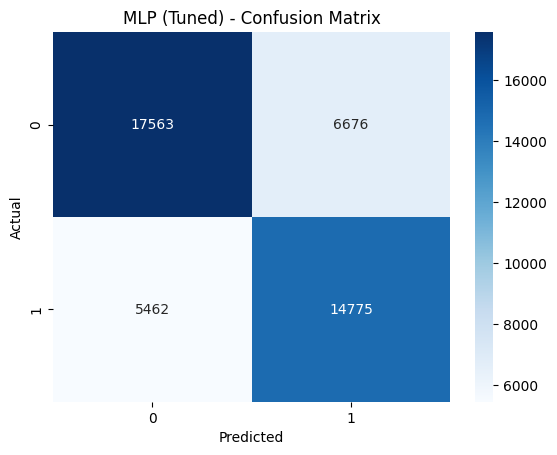

MLP (Tuned) - Classification Report
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     24239
           1       0.69      0.73      0.71     20237

    accuracy                           0.73     44476
   macro avg       0.73      0.73      0.73     44476
weighted avg       0.73      0.73      0.73     44476



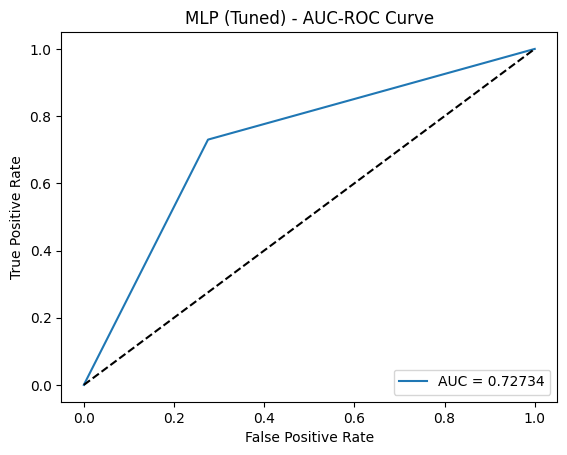

In [ ]:
y_pred = (mlp_best.predict(X_test) > 0.5).astype("int32")
y_prob = mlp_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('MLP (Tuned) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('MLP (Tuned) - Classification Report')
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.5f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP (Tuned) - AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()